##Analyze Bike Store Sales
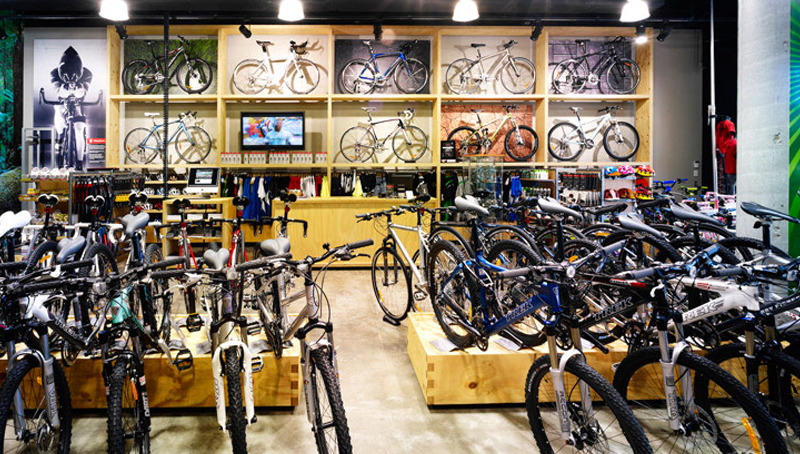

##Exploratory Data Analysis - EDA
**Goal**: Understand the structure of the data, detect missing values and outliers, and explore distributions and relationships between variables.

In [82]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
from prophet import Prophet
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#Load data
sales = pd.read_csv('sales_data.csv')

In [3]:
sales.shape

(5000, 16)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [5]:
sales.head()

Date  Day      Month  Year  Customer_Age Customer_Gender  \
0  2014-03-05    5      March  2014            34               M   
1  2013-08-18   18     August  2013            31               F   
2  2014-02-04    4   February  2014            31               F   
3  2013-09-09    9  September  2013            33               M   
4  2016-05-16   16        May  2016            35               F   

         Country             State Product_Category     Sub_Category  \
0  United States        California      Accessories          Fenders   
1         Canada  British Columbia         Clothing            Vests   
2  United States        Washington            Bikes    Touring Bikes   
3      Australia          Victoria      Accessories  Tires and Tubes   
4  United States        Washington      Accessories  Tires and Tubes   

                   Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  \
0    Fender Set - Mountain              27          8          22     366   
1          Classic Vest, L              13         24          64     512   
2  Touring-1000 Yellow, 54               1       1482        2384     378   
3             LL Road Tire              25          8          21     215   
4       Mountain Tire Tube              28          2           5      53   

   Revenue  
0      582  
1      824  
2     1860  
3      415  
4      109

In [6]:
sales.tail()

Date  Day     Month  Year  Customer_Age Customer_Gender  \
4995  2014-01-27   27   January  2014            34               M   
4996  2014-07-14   14      July  2014            17               M   
4997  2013-12-30   30  December  2013            25               F   
4998  2016-01-06    6   January  2016            57               M   
4999  2014-03-09    9     March  2014            50               F   

            Country             State Product_Category       Sub_Category  \
4995  United States        California      Accessories  Bottles and Cages   
4996         France        Val d'Oise         Clothing               Caps   
4997         Canada  British Columbia      Accessories            Helmets   
4998         Canada  British Columbia      Accessories    Tires and Tubes   
4999      Australia        Queensland      Accessories    Tires and Tubes   

                     Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  \
4995   Water Bottle - 30 oz.              20          2           5      58   
4996            AWC Logo Cap              12          7           9       1   
4997  Sport-100 Helmet, Blue              20         13          35     433   
4998     Patch Kit/8 Patches              16          1           2      16   
4999     Patch Kit/8 Patches              15          1           2      10   

      Revenue  
4995       98  
4996       85  
4997      693  
4998       32  
4999       25

In [7]:
# Check for missing values
print(sales.isnull().sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Revenue             0
dtype: int64


In [8]:
#Statistical Summary
sales.describe()

Day         Year  Customer_Age  Order_Quantity    Unit_Cost  \
count  5000.000000  5000.000000   5000.000000     5000.000000  5000.000000   
mean     15.668800  2014.405000     35.933800       11.820400   278.415000   
std       8.797783     1.266055     11.087886        9.607841   562.721951   
min       1.000000  2011.000000     17.000000        1.000000     1.000000   
25%       8.000000  2013.000000     28.000000        2.000000     2.000000   
50%      16.000000  2014.000000     35.000000       10.000000     9.000000   
75%      23.000000  2016.000000     43.000000       20.000000    42.000000   
max      31.000000  2016.000000     87.000000       32.000000  2171.000000   

        Unit_Price       Profit       Revenue  
count  5000.000000  5000.000000   5000.000000  
mean    470.680600   291.653400    772.758000  
std     941.590529   457.359971   1306.052588  
min       2.000000   -24.000000      2.000000  
25%       5.000000    29.000000     64.000000  
50%      25.000000   103.000000    226.000000  
75%      70.000000   367.000000    829.250000  
max    3578.000000  5342.000000  14026.000000

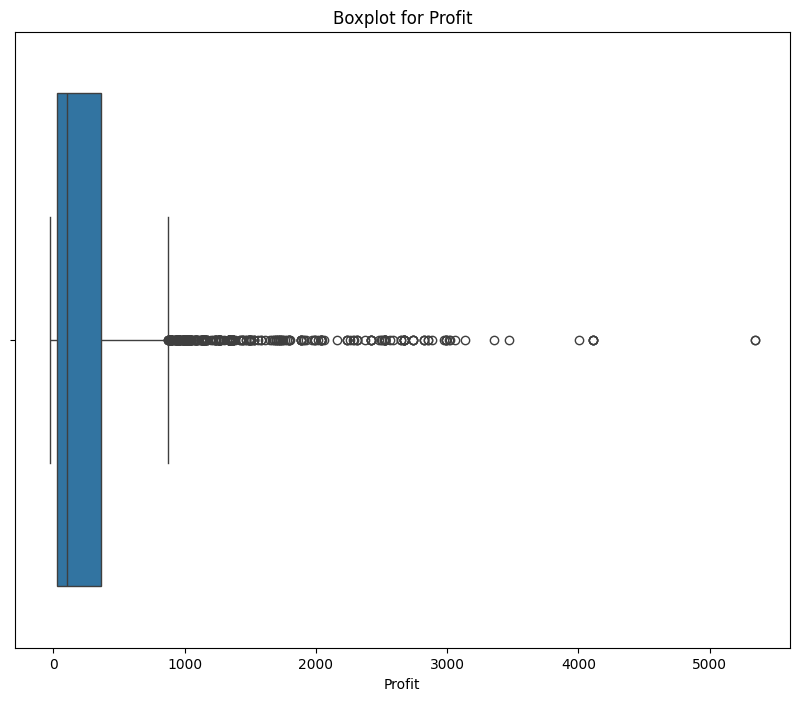

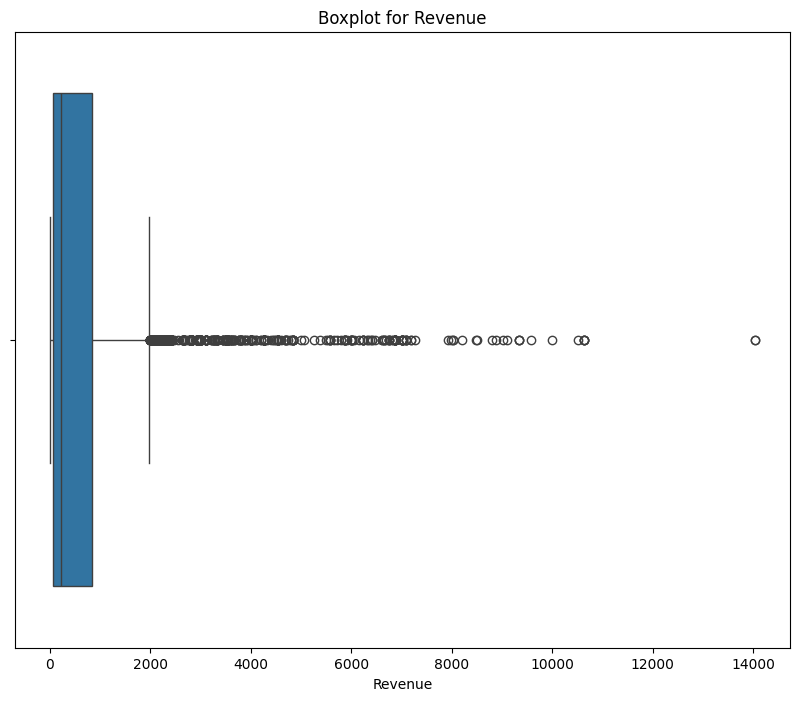

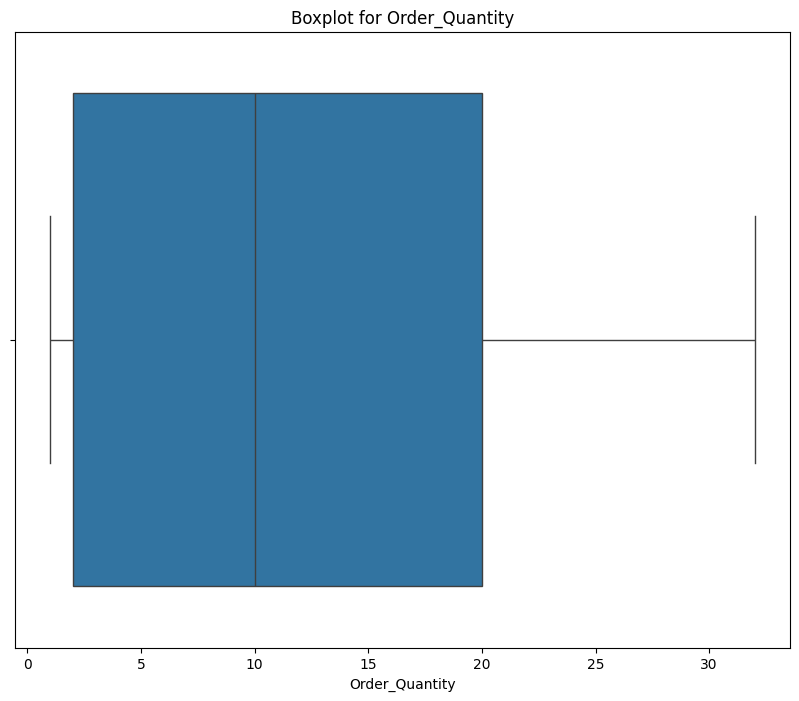

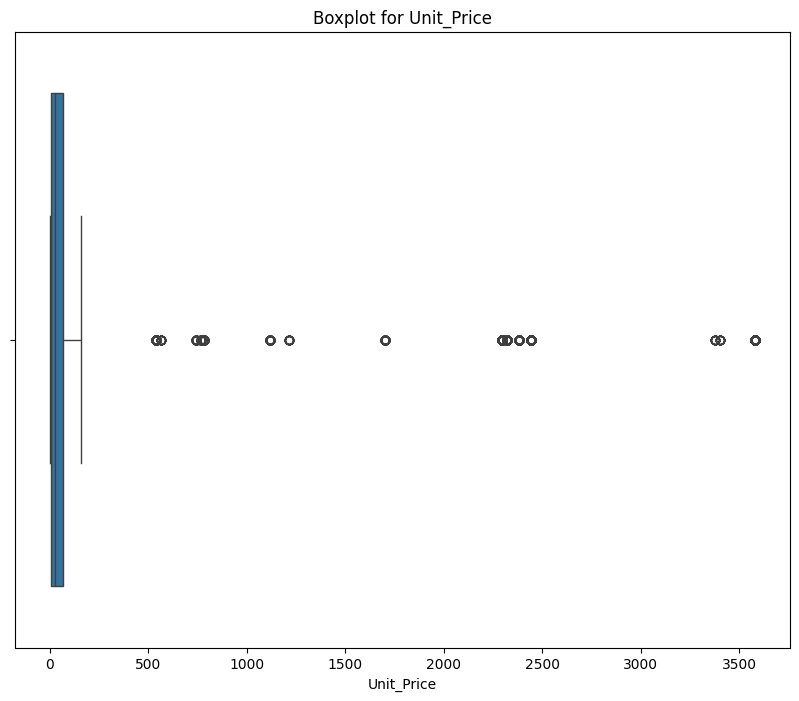

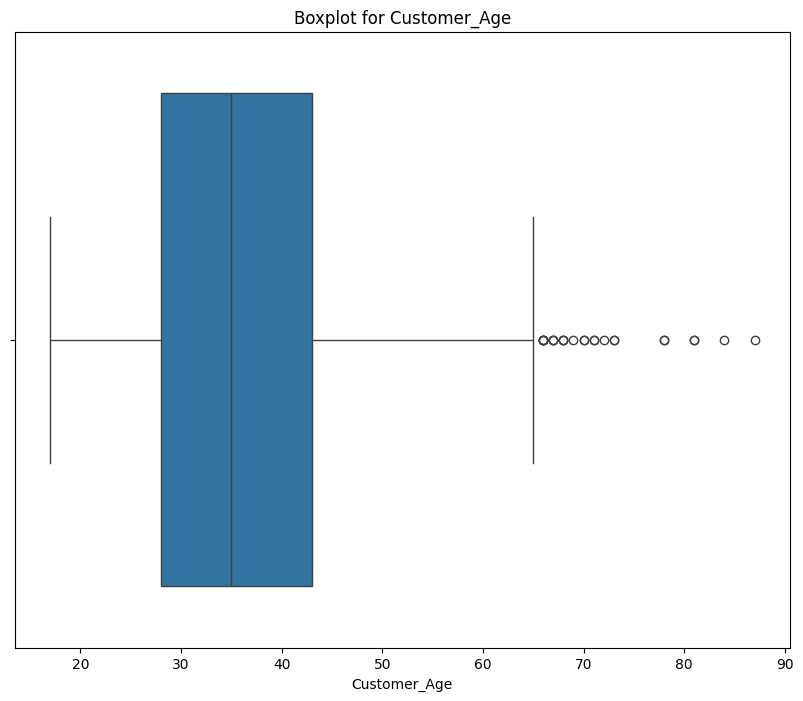

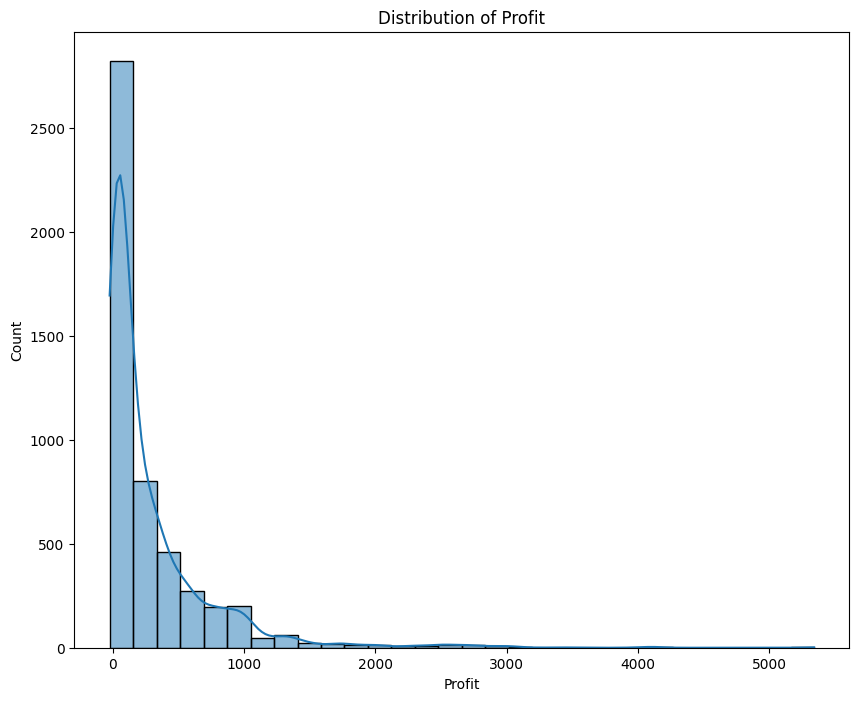

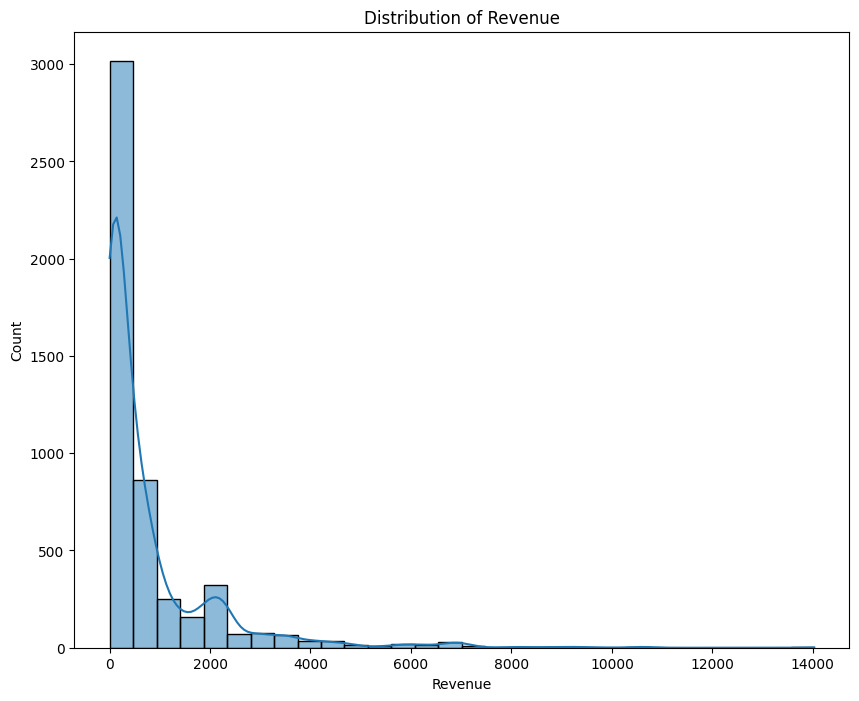

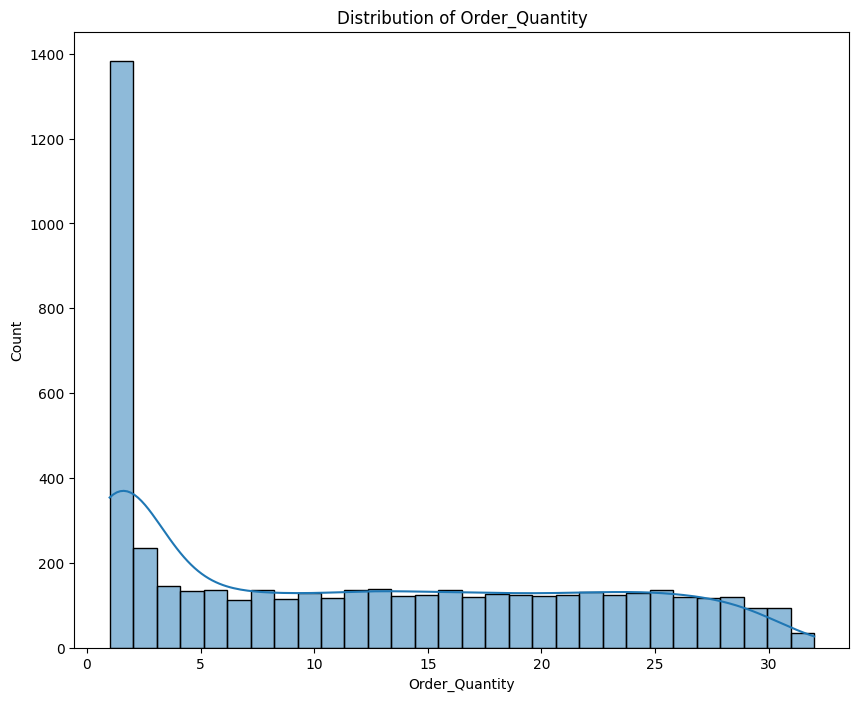

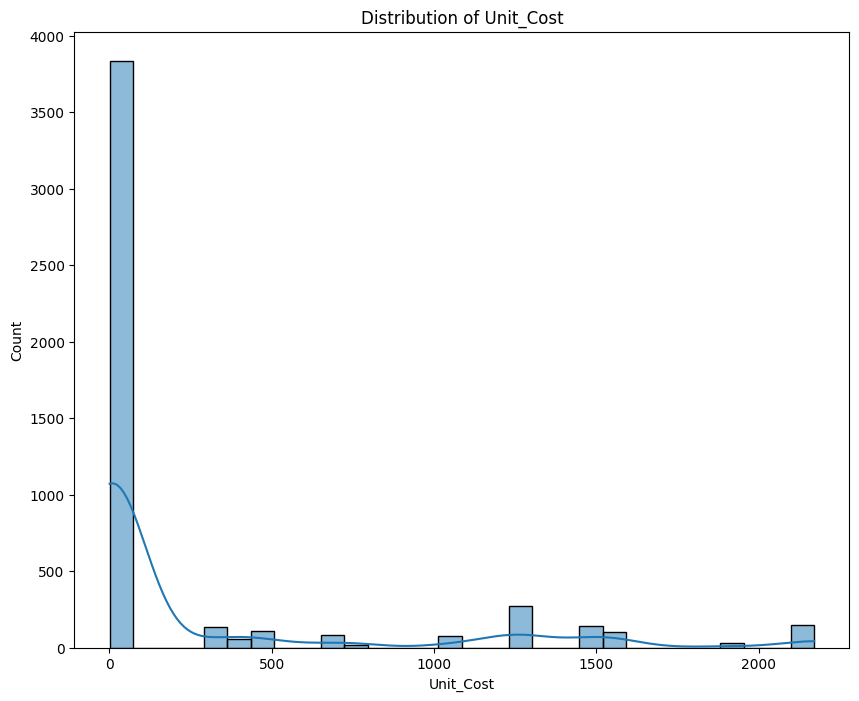

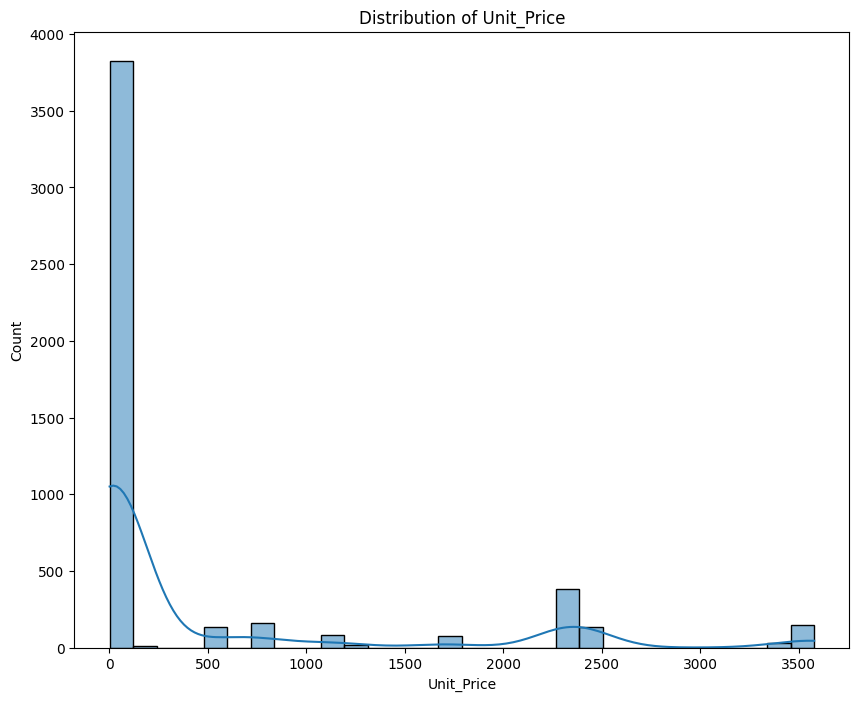

In [9]:
# Boxplots for numerical features
# Purpose: Detect outliers that could skew analysis or modeling
numeric_cols = ['Profit', 'Revenue', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Customer_Age']

for col in numeric_cols:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=sales[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Histograms with KDE for distribution
# Purpose: Understand the distribution of each numerical variable (normal, skewed, etc.)
for col in numeric_cols:
    plt.figure(figsize=(10, 8))
    sns.histplot(sales[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation Heatmap
# Purpose: Identify the strength and direction of relationships between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(sales[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

##Data Cleaning & Preprocessing
**Goal**: Ensure the dataset is clean and ready for analysis by handling duplicates,fixing data types, and preparing categorical and datetime columns.

In [10]:
sales.duplicated().sum()

np.int64(1)

In [11]:
duplicates_all = sales[sales.duplicated(keep=False)]
print(duplicates_all)

            Date  Day     Month  Year  Customer_Age Customer_Gender  \
2663  2015-12-21   21  December  2015            23               M   
3424  2015-12-21   21  December  2015            23               M   

             Country    State Product_Category    Sub_Category  \
2663  United Kingdom  England            Bikes  Mountain Bikes   
3424  United Kingdom  England            Bikes  Mountain Bikes   

                        Product  Order_Quantity  Unit_Cost  Unit_Price  \
2663  Mountain-400-W Silver, 46               3        420         769   
3424  Mountain-400-W Silver, 46               3        420         769   

      Profit  Revenue  
2663     955     2215  
3424     955     2215  


In [12]:
# Remove duplicates
sales = sales.drop_duplicates(keep='first')
print(sales.shape)

(4999, 16)


In [13]:
# Fixing Column Types
sales['Date'] = pd.to_datetime(sales['Date'])

categorical_columns = ['Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category']

for col in categorical_columns:
    sales[col] = sales[col].astype('category')

In [14]:
sales.dtypes

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Customer_Gender           category
Country                   category
State                     category
Product_Category          category
Sub_Category              category
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Revenue                      int64
dtype: object

##Feature Engineering
**Goal**: Create new columns that provide more insight and support advanced analysis.

Created a new feature `Customer_Segment` by applying K-Means clustering on key customer attributes (Customer_Age, Revenue, Profit) to segment customers into distinct groups.

In [15]:
# Create new columns

# Add YearMonth column (Year and Month combined)
sales['YearMonth'] = sales['Date'].dt.to_period('M').astype(str)

# Extract the year from the 'Date' column and create a new 'Year' column
sales['Year'] = sales['Date'].dt.year

# Extract the month from the 'Date' column and create a new 'Month' column
sales['Month'] = sales['Date'].dt.month

# Extract the day from the 'Date' column and create a new 'Day' column
sales['Day'] = sales['Date'].dt.day

# Create Month_Name column
sales['Month_Name'] = sales['Date'].dt.month_name()

# Create a new column with the day name (e.g., Monday, Tuesday, etc.)
sales['Weekday'] = sales['Date'].dt.day_name()

# Create a new column that identifies whether the day is a weekend
sales['Is_Weekend'] = sales['Date'].dt.dayofweek.isin([5, 6])    # Saturday=5, Sunday=6

# Create 'Season' column
sales['Month'] = sales['Date'].dt.month
seasons = {12: 'Winter', 1: 'Winter', 2: 'Winter',
           3: 'Spring', 4: 'Spring', 5: 'Spring',
           6: 'Summer', 7: 'Summer', 8: 'Summer',
           9: 'Fall', 10: 'Fall', 11: 'Fall'}
sales['Season'] = sales['Month'].map(seasons)


# Create a new column for Profit per Unit (avoid division by zero)

sales['Profit_per_Unit'] = np.where(
    (sales['Order_Quantity'] == 0) | (sales['Order_Quantity'].isna()),
    np.nan,
    sales['Profit'] / sales['Order_Quantity']
)

# Calculate Total Cost = Unit Cost * Order Quantity
sales['Total_Cost'] = sales['Unit_Cost'] * sales['Order_Quantity']

# Calculate Order Value = Unit Price * Order Quantity
sales['Order_Value'] = sales['Unit_Price'] * sales['Order_Quantity']

# Calculate Gross Profit Margin = Profit / Revenue
sales['Gross_Profit_Margin'] = sales['Profit'] / sales['Revenue']

# Create Age Group categories for customers
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['<18', '18-25', '26-35', '36-50', '51-65', '65+']
sales['Age_Group'] = pd.cut(sales['Customer_Age'], bins=bins, labels=labels)

## Data Analysis



###Customer Analysis

In this section, we leverage the previously created `Age_Group` feature to explore revenue, profit, and customer behavior across different age segments. Additionally, customer segmentation using K-Means clustering is performed based on age, revenue, and profit. This segmentation uncovers distinct customer groups, providing valuable insights for targeted marketing and personalized strategies.



In [16]:
#Customer Age Analysis
#What's the mean of Customers age?
sales['Customer_Age'].mean()

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# KDE plot on the first subplot
sns.kdeplot(sales['Customer_Age'], ax=axes[0], color='blue')
axes[0].set_title("Customer Age - KDE")

# Boxplot on the second subplot
sns.boxplot(x=sales['Customer_Age'], ax=axes[1], color='orange')
axes[1].set_title("Customer Age - Boxplot")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

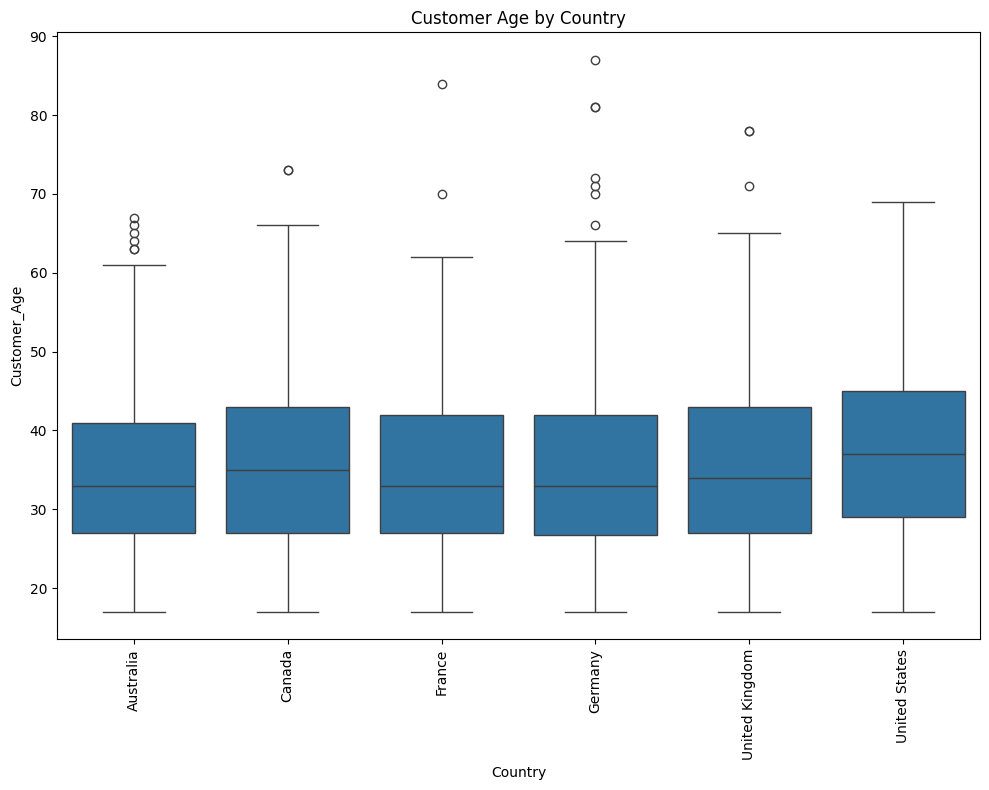

In [17]:
# Customer Age by Country
plt.figure(figsize=(10, 8))
sns.boxplot(x='Country', y='Customer_Age', data=sales)
plt.xticks(rotation=90)
plt.title("Customer Age by Country")
plt.tight_layout()
plt.show()

In [18]:
# Which gender has the most amount of sales?
sales['Customer_Gender'].value_counts()

Customer_Gender
M    2563
F    2436
Name: count, dtype: int64

In [19]:
# Sales Count by Customer Gender
plt.figure(figsize=(10, 8))
sales['Customer_Gender'].value_counts().plot(kind='bar', title='Sales Count by Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [20]:
# Count of Sales with Revenue > 500 by Male Customers
high_value_male_sales = sales[(sales['Revenue'] > 500) & (sales['Customer_Gender'] == 'M')].shape[0]
print("High-value male sales (Revenue > 500):", high_value_male_sales)

High-value male sales (Revenue > 500): 994


Age_Group          <18   18-25   26-35   36-50   51-65   65+
Customer_Gender                                             
F                62928  270115  672209  721650  212455  1160
M                40489  302823  663667  700190  210431  3458


<ipython-input-21-654402589>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_sales = sales.groupby(['Customer_Gender', 'Age_Group'])['Revenue'].sum().unstack()


<Figure size 1000x800 with 0 Axes>

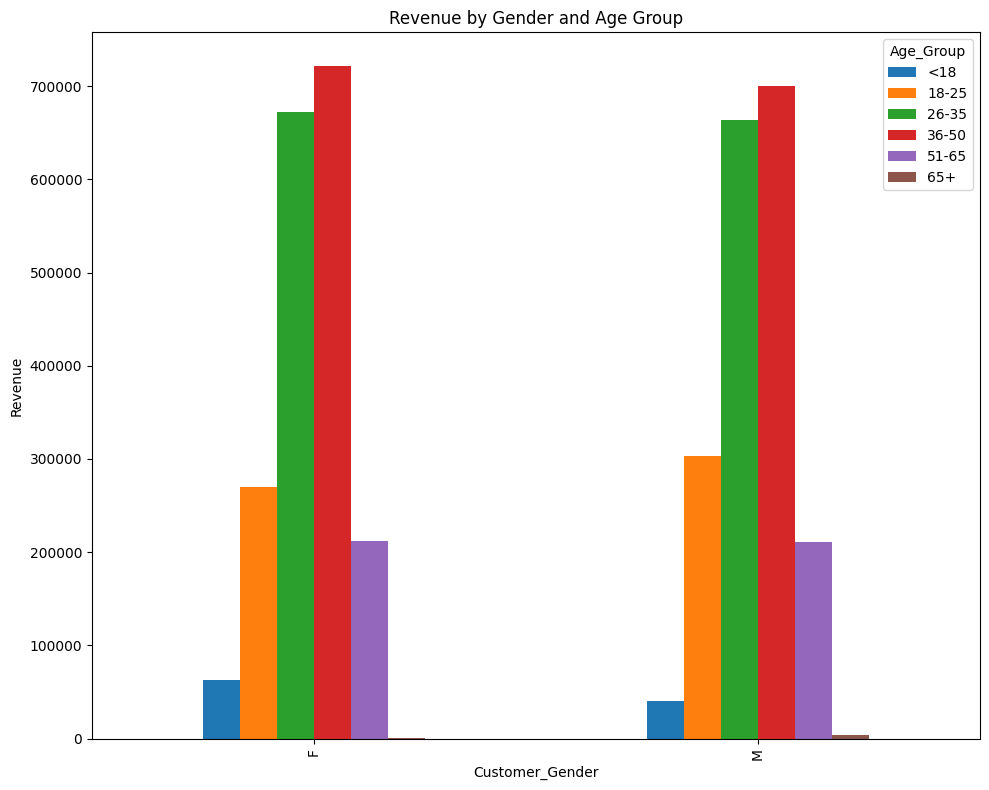

In [21]:
# Total Revenue by Gender and Age Group
age_gender_sales = sales.groupby(['Customer_Gender', 'Age_Group'])['Revenue'].sum().unstack()
print(age_gender_sales)

plt.figure(figsize=(10, 8))
age_gender_sales.plot(kind='bar', title='Revenue by Gender and Age Group', figsize=(10, 8))
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

<ipython-input-22-1995623344>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales.groupby('Age_Group')['Revenue'].sum().plot(kind='bar', title='Revenue by Age Group')


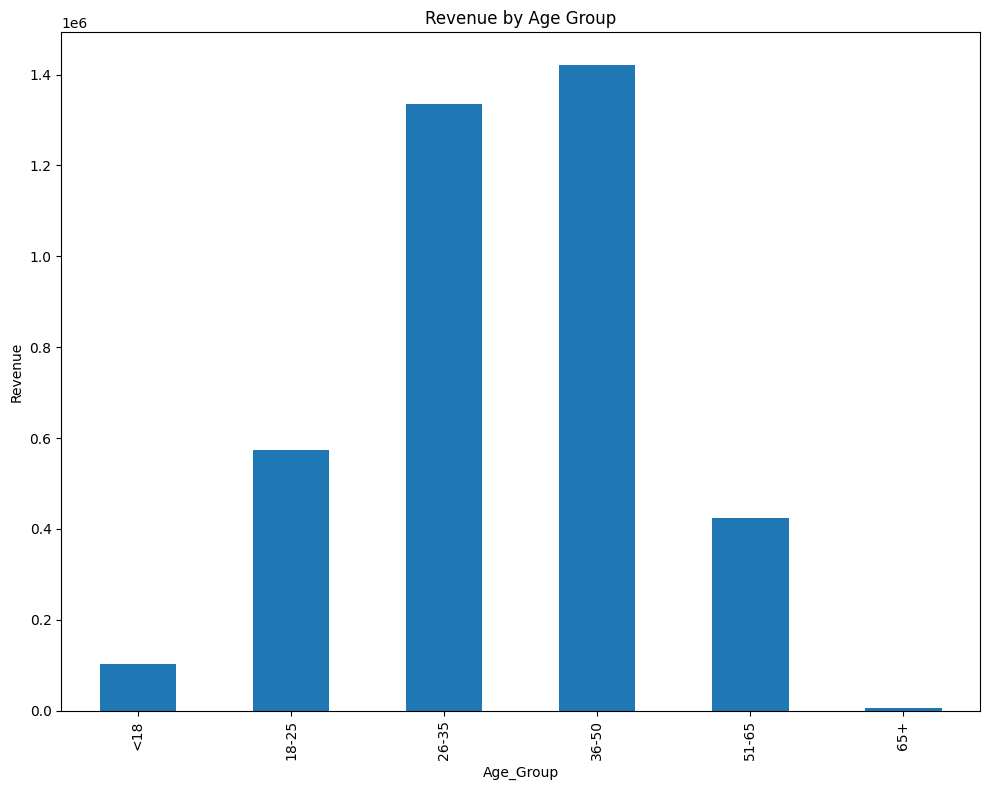

In [22]:
# Total Revenue by Age Group
plt.figure(figsize=(10, 8))
sales.groupby('Age_Group')['Revenue'].sum().plot(kind='bar', title='Revenue by Age Group')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

<ipython-input-23-2249138303>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_age = sales.groupby('Age_Group')['Profit'].mean().sort_values(ascending=False)


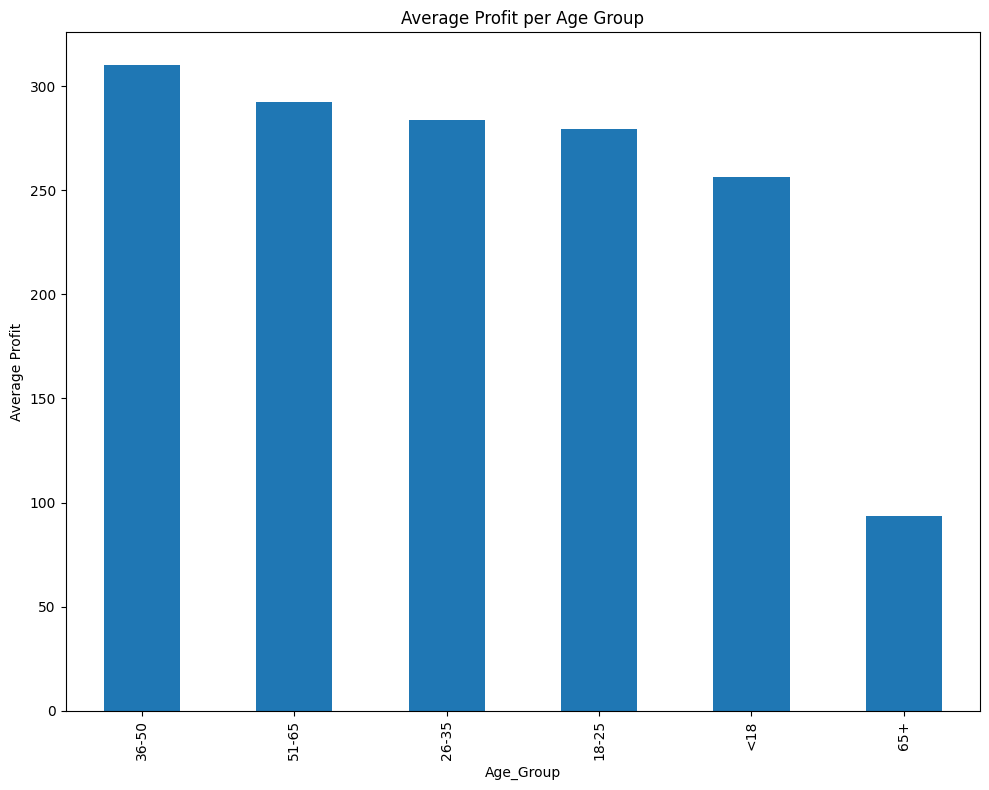

In [23]:
# Average Profit by Age Group
plt.figure(figsize=(10, 8))
profit_by_age = sales.groupby('Age_Group')['Profit'].mean().sort_values(ascending=False)
profit_by_age.plot(kind='bar', title='Average Profit per Age Group')
plt.ylabel('Average Profit')
plt.tight_layout()
plt.show()

In [24]:
# Purchase Frequency by Gender
plt.figure(figsize=(10, 8))
purchase_freq = sales.groupby(['Customer_Age', 'Customer_Gender']).size().reset_index(name='Purchase_Count')
sns.boxplot(data=purchase_freq, x='Customer_Gender', y='Purchase_Count')
plt.title('Purchase Frequency by Gender')
plt.tight_layout()
plt.show()

<ipython-input-24-3513440525>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_freq = sales.groupby(['Customer_Age', 'Customer_Gender']).size().reset_index(name='Purchase_Count')


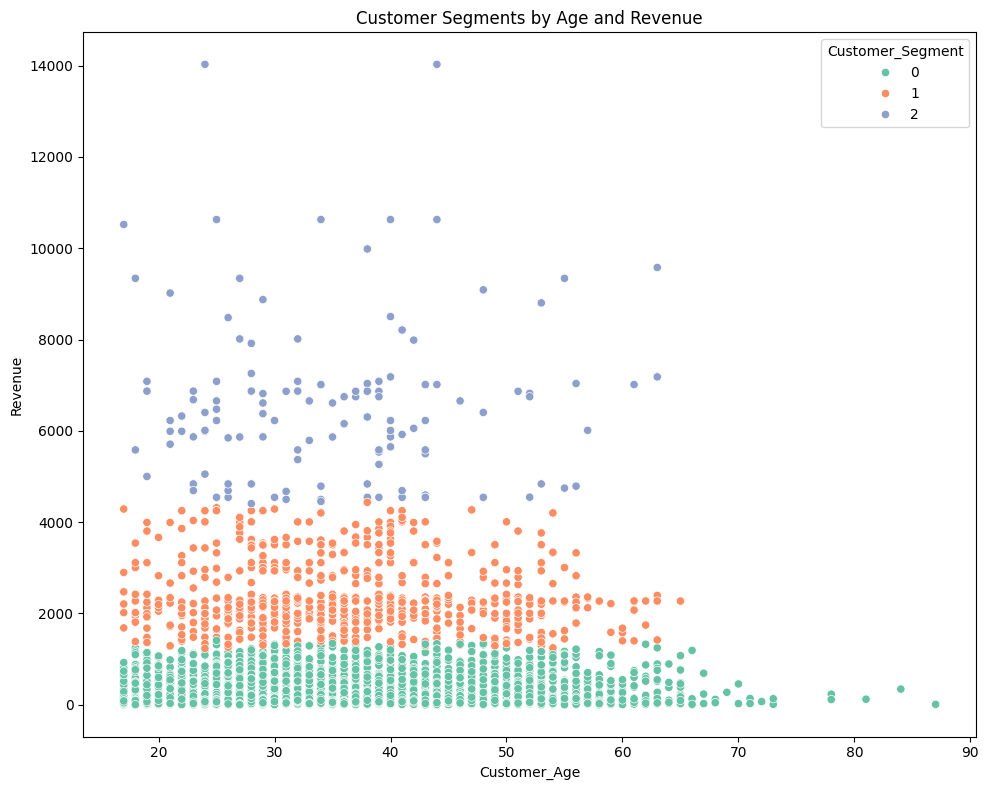

In [25]:
#  Customer Segmentation using K-Means (based on Age, Revenue, and Profit)

features = sales[['Customer_Age', 'Revenue', 'Profit']]
kmeans = KMeans(n_clusters=3, random_state=0)
sales['Customer_Segment'] = kmeans.fit_predict(features)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sales, x='Customer_Age', y='Revenue', hue='Customer_Segment', palette='Set2')
plt.title('Customer Segments by Age and Revenue')
plt.tight_layout()
plt.show()

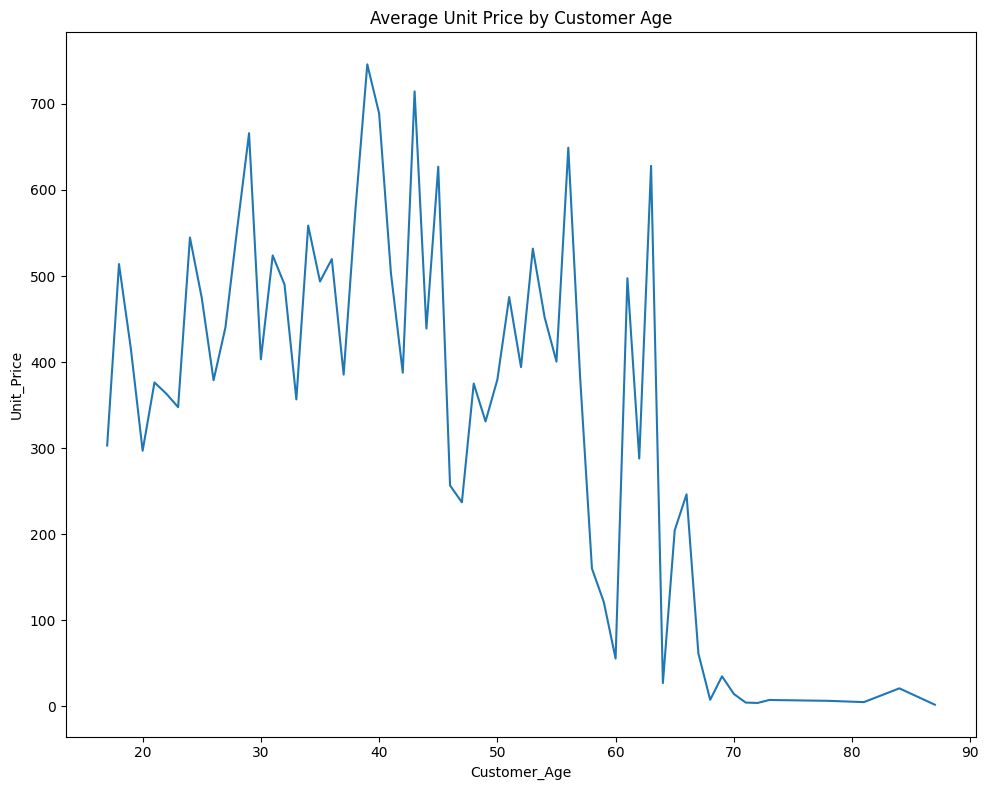

In [26]:
# Average Unit Price by Customer Age
plt.figure(figsize=(10, 8))
age_price = sales.groupby('Customer_Age')['Unit_Price'].mean().reset_index()
sns.lineplot(data=age_price, x='Customer_Age', y='Unit_Price')
plt.title('Average Unit Price by Customer Age')
plt.tight_layout()
plt.show()

In [27]:
# Average Revenue by Gender
plt.figure(figsize=(10, 8))
gender_rev = sales.groupby('Customer_Gender')['Revenue'].mean()
gender_rev.plot(kind='bar', title='Average Revenue by Gender')
plt.ylabel('Average Revenue')
plt.tight_layout()
plt.show()

<ipython-input-27-3792549714>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_rev = sales.groupby('Customer_Gender')['Revenue'].mean()


In [28]:
# Most Common Product per Age Group
most_common_product = sales.groupby(['Age_Group', 'Product'], observed=False)['Order_Quantity'].sum().reset_index()
most_common_product = most_common_product.sort_values(['Age_Group', 'Order_Quantity'], ascending=[True, False])

In [29]:
top_products_per_group = most_common_product.groupby('Age_Group').first().reset_index()
print(top_products_per_group)

  Age_Group                Product  Order_Quantity
0       <18     Mountain Tire Tube             226
1     18-25    Patch Kit/8 Patches            1469
2     26-35  Water Bottle - 30 oz.            3030
3     36-50  Water Bottle - 30 oz.            2669
4     51-65    Patch Kit/8 Patches             889
5       65+      Touring Tire Tube              86


<ipython-input-29-1919461311>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products_per_group = most_common_product.groupby('Age_Group').first().reset_index()


In [30]:
plt.figure(figsize=(10, 8))
sns.barplot(data=top_products_per_group, x='Age_Group', y='Order_Quantity', hue='Product')
plt.title('Most Common Product per Age Group')
plt.ylabel('Total Order Quantity')
plt.tight_layout()
plt.show()

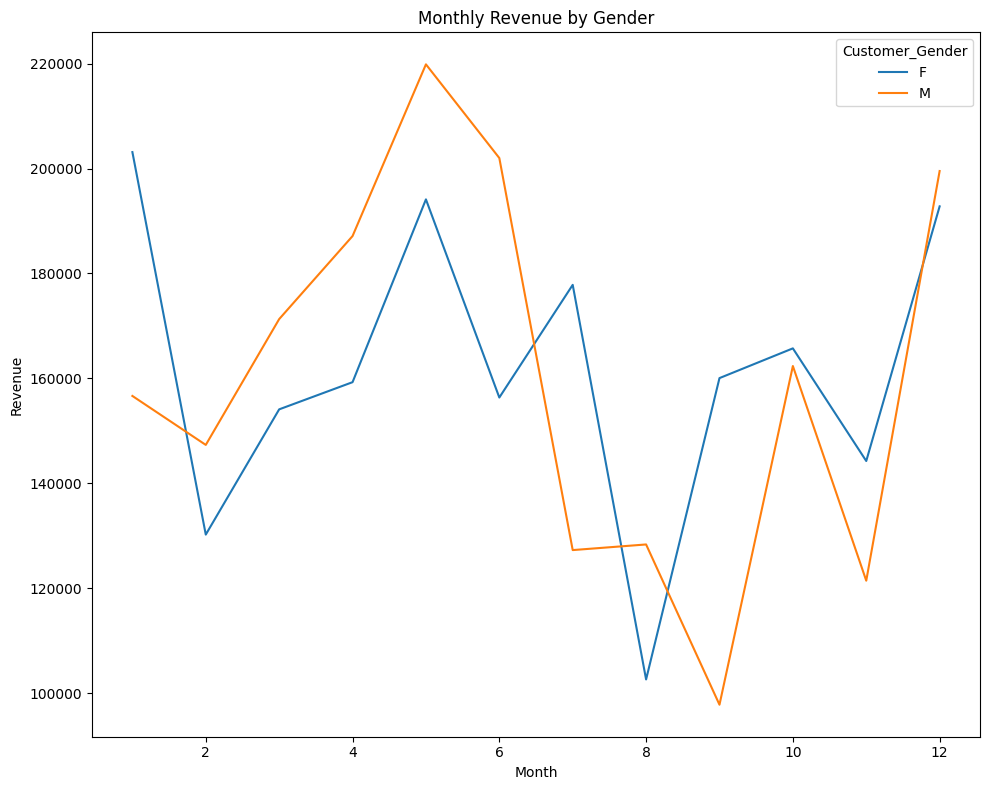

In [31]:
monthly_gender_sales = sales.groupby(['Month', 'Customer_Gender'], observed=False)['Revenue'].sum().unstack()
monthly_gender_sales.plot(kind='line', title='Monthly Revenue by Gender', figsize=(10, 8))
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


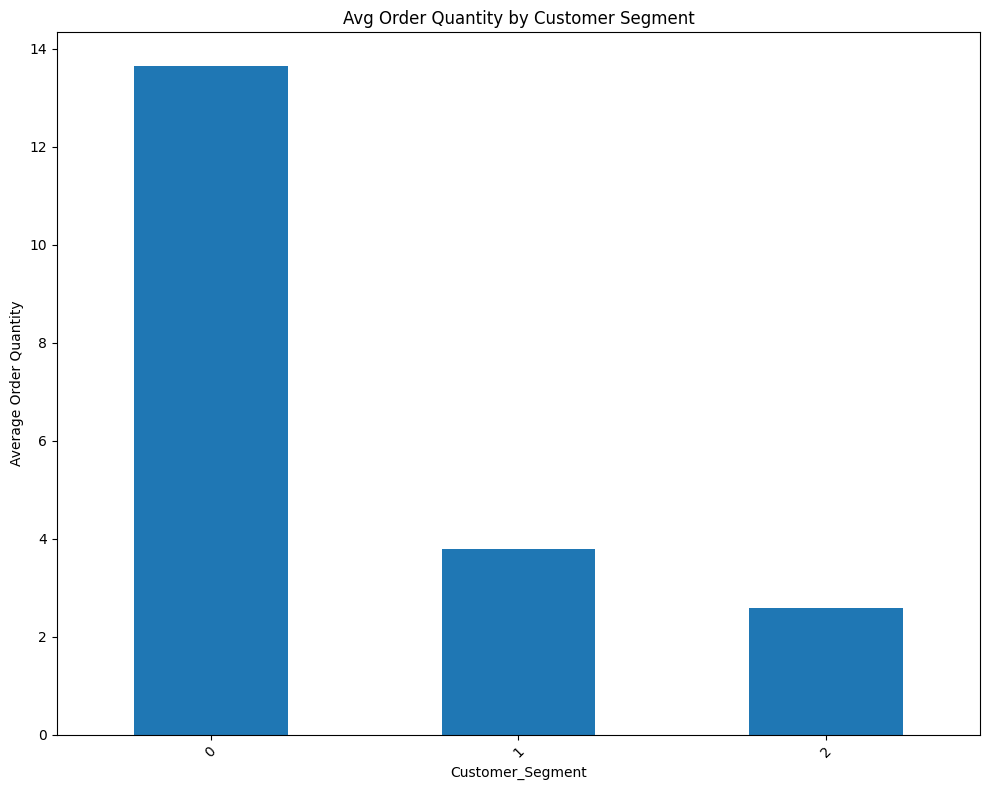

In [32]:
# Average Order Quantity per Customer Segment
plt.figure(figsize=(10, 8))
sales.groupby('Customer_Segment')['Order_Quantity'].mean().plot(kind='bar', title='Avg Order Quantity by Customer Segment')
plt.ylabel('Average Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Order Analysis
This section focuses on analyzing order quantities, distribution across Countries, and variations in ordering patterns among different customer segments and product categories. The insights help identify trends and opportunities to optimize inventory management and sales strategies.

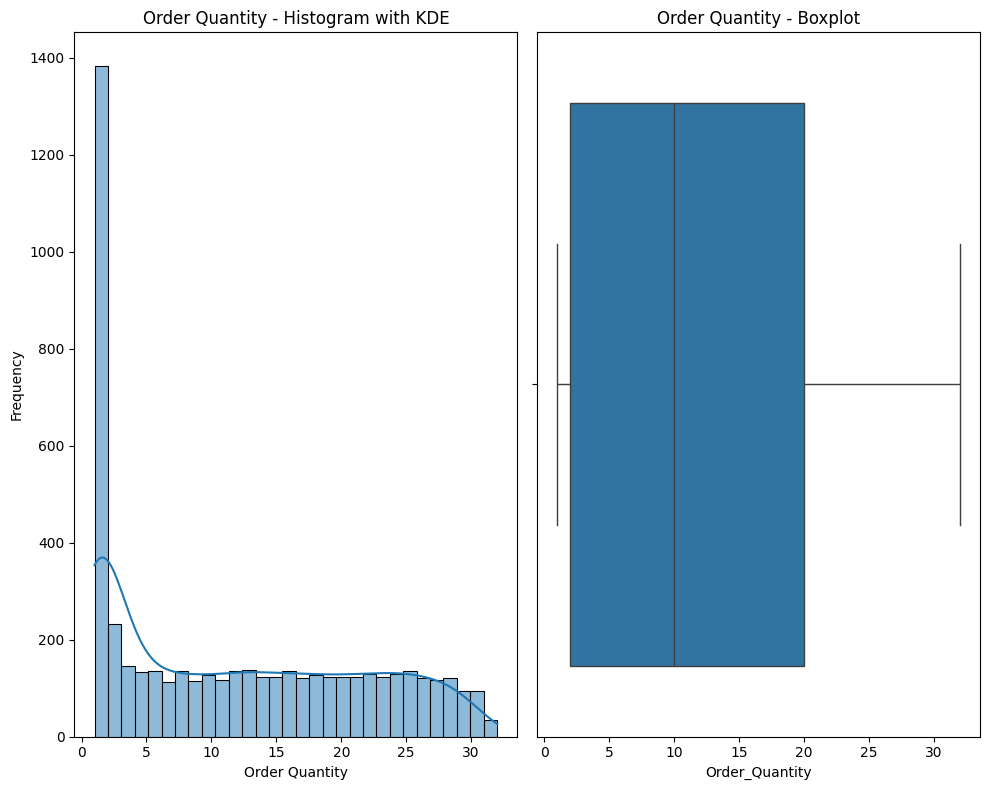

In [33]:
# What's the mean of Order Quantity?
sales['Order_Quantity'].mean()

fig, axs = plt.subplots(1, 2, figsize=(10, 8))

# Histogram with KDE
sns.histplot(data=sales, x='Order_Quantity', bins=30, kde=True, ax=axs[0])
axs[0].set_title("Order Quantity - Histogram with KDE")
axs[0].set_xlabel("Order Quantity")
axs[0].set_ylabel("Frequency")

# Boxplot
sns.boxplot(x=sales['Order_Quantity'], ax=axs[1])
axs[1].set_title("Order Quantity - Boxplot")

plt.tight_layout()
plt.show()

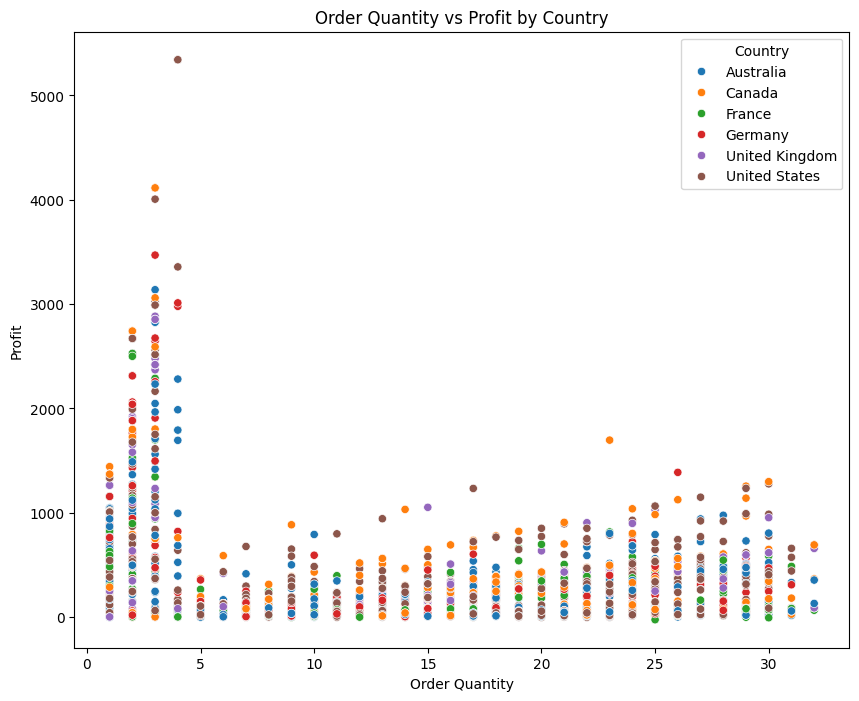

In [34]:
# Relationship between Order Quantity and Profit by Country
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Order_Quantity', y='Profit', hue='Country', data=sales)
plt.title('Order Quantity vs Profit by Country')
plt.xlabel('Order Quantity')
plt.ylabel('Profit')
plt.legend(title='Country')
plt.show()

In [35]:
# Count of orders made in Canada or France
sales[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

1146

In [36]:
# Number of Bike Racks orders from Canada
sales[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

3

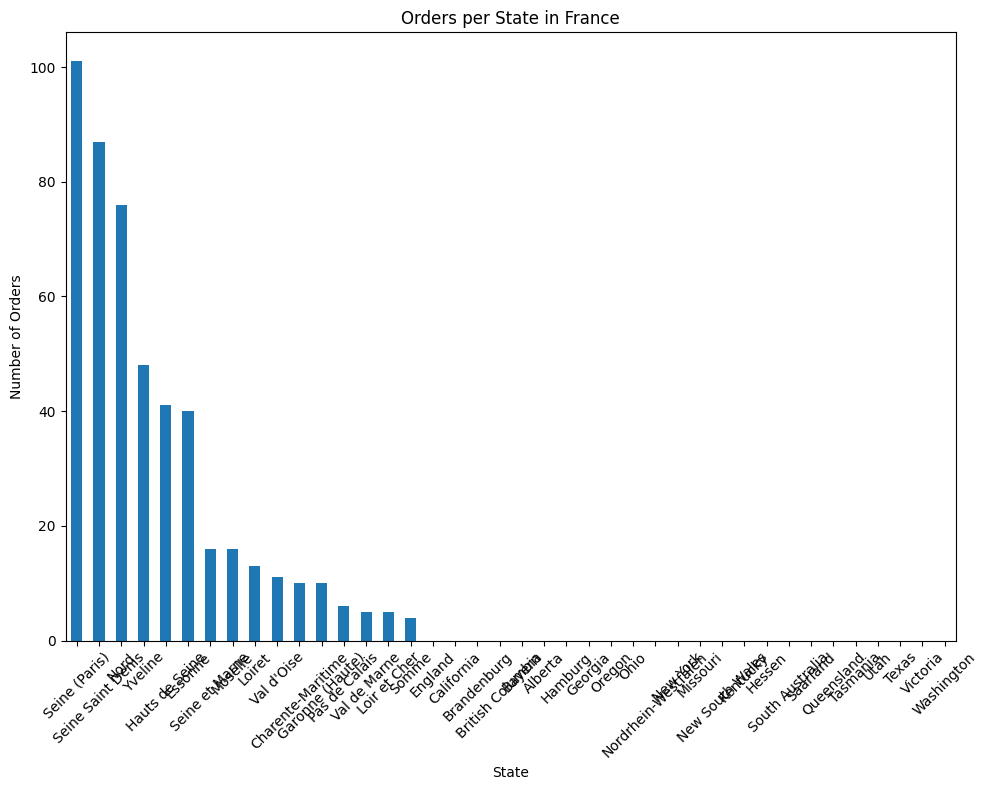

In [39]:
# Orders per State in France
france_states = sales[sales['Country'] == 'France']['State'].value_counts()

plt.figure(figsize=(10, 8))
france_states.plot(kind='bar', title='Orders per State in France')
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

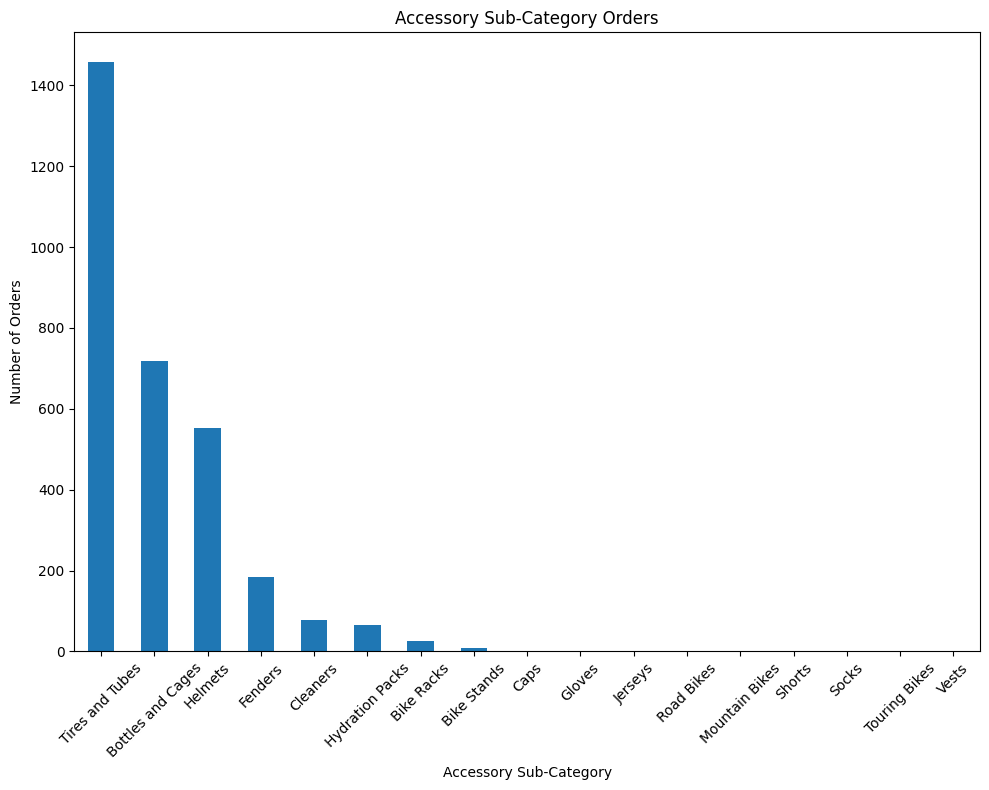

In [38]:
# Orders per Accessory Sub-Category
accessory_sales = sales[sales['Product_Category'] == 'Accessories']['Sub_Category'].value_counts()
plt.figure(figsize=(10, 8))
accessory_sales.plot(kind='bar', title='Accessory Sub-Category Orders')
plt.xlabel("Accessory Sub-Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

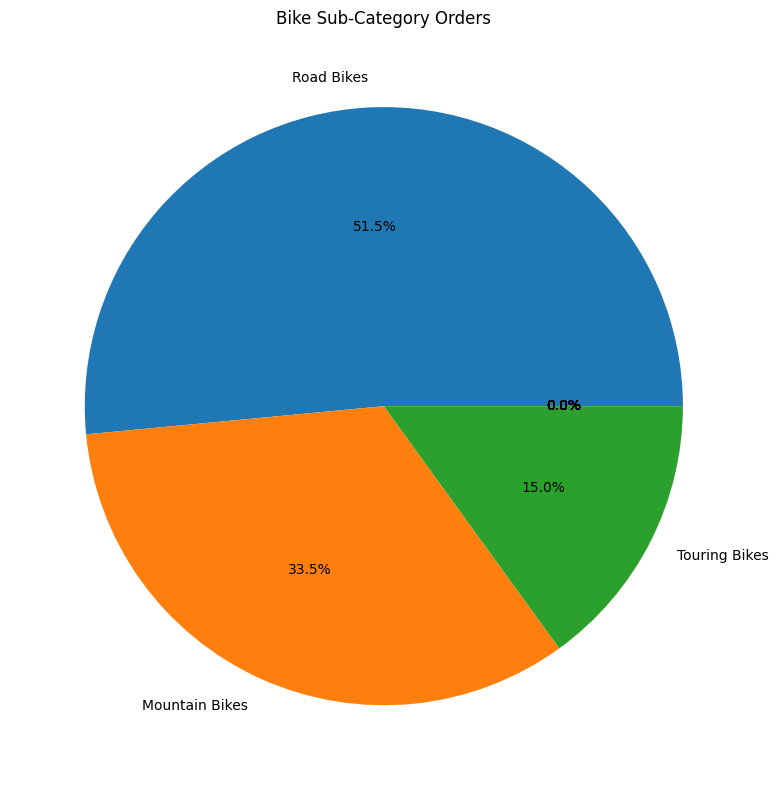

In [40]:
# Orders per Bike Sub-Category
bike_sales = sales[sales['Product_Category'] == 'Bikes']['Sub_Category'].value_counts()
plt.figure(figsize=(10, 8))
bike_sales.plot.pie(autopct='%1.1f%%', title='Bike Sub-Category Orders')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [41]:
# Mean Order Quantity for orders with revenue > 10K
sales[sales['Revenue'] > 10000]['Order_Quantity'].mean()

np.float64(3.2857142857142856)

In [42]:
# Mean Order Quantity for orders with revenue < 10K
sales[sales['Revenue'] < 10000]['Order_Quantity'].mean()

np.float64(11.834134615384615)

<Axes: xlabel='Revenue_Group', ylabel='Order_Quantity'>

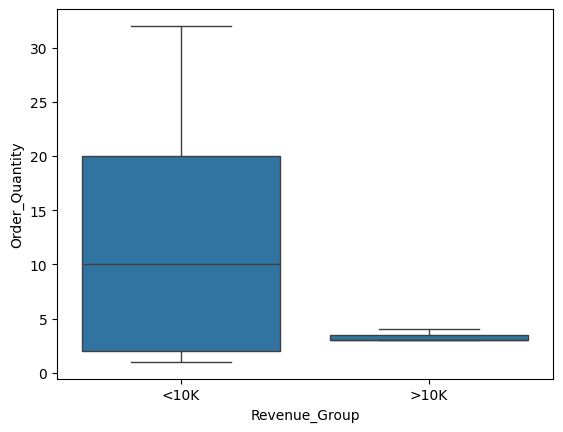

In [43]:
sales['Revenue_Group'] = np.where(sales['Revenue'] > 10000, '>10K', '<10K')
sns.boxplot(x='Revenue_Group', y='Order_Quantity', data=sales)

In [44]:
# Orders made in May 2016
sales[(sales['Date'].dt.year == 2016) & (sales['Date'].dt.month == 5)].shape[0]

214

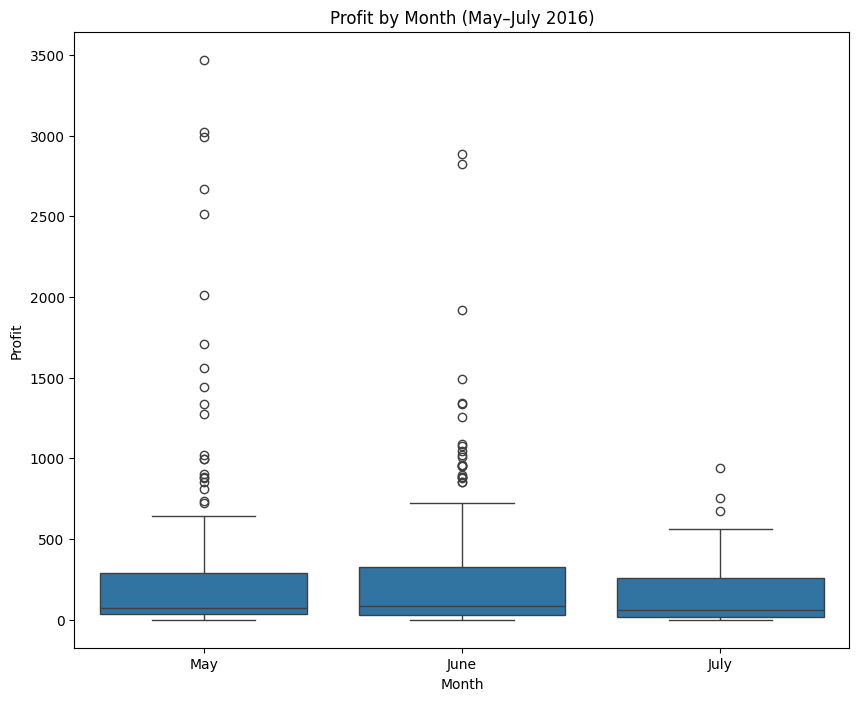

In [45]:
# Orders made between May and July 2016
mask = (sales['Date'] >= '2016-05-01') & (sales['Date'] <= '2016-07-31')

# Define correct month order
month_order = ['May', 'June', 'July']
sales['Month_Name'] = pd.Categorical(sales['Month_Name'], categories=month_order, ordered=True)

# Boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Month_Name', y='Profit', data=sales[mask])
plt.title('Profit by Month (May–July 2016)')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

<ipython-input-46-850241244>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales.groupby('Product_Category')['Order_Quantity'].mean().plot(kind='bar', title='Avg Order Quantity by Product Category')


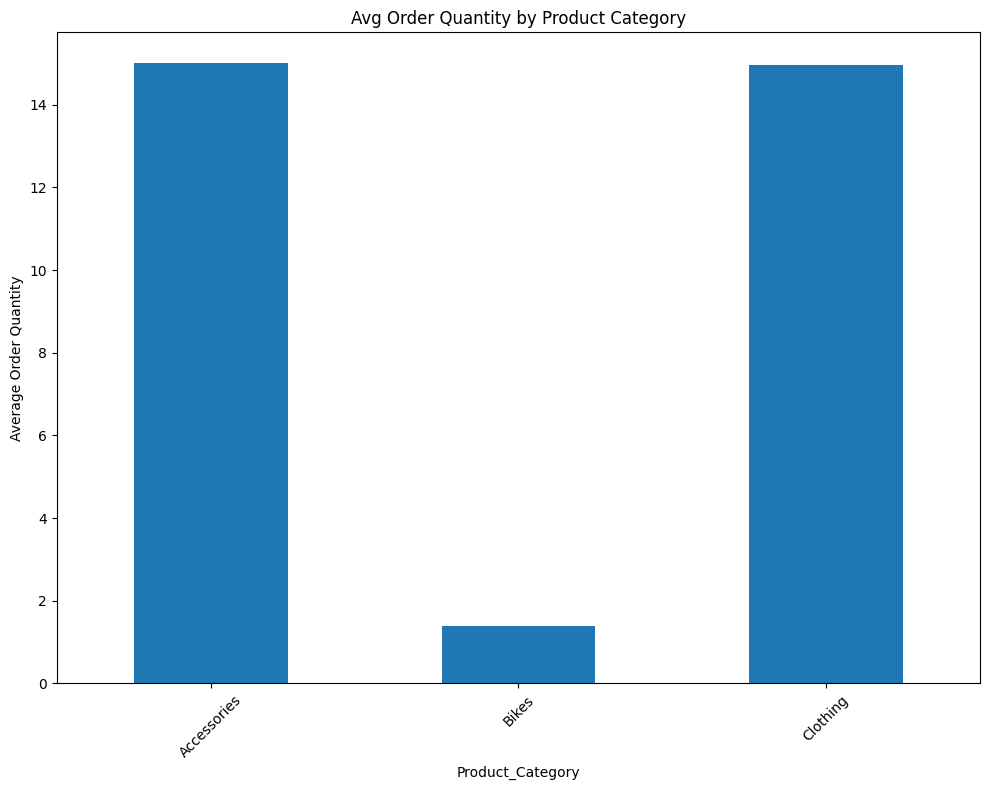

In [46]:
# Average Order Quantity per Product Category
plt.figure(figsize=(10, 8))
sales.groupby('Product_Category')['Order_Quantity'].mean().plot(kind='bar', title='Avg Order Quantity by Product Category')
plt.ylabel('Average Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
# Monthly Trend of Average Order Quantity
monthly_qty = sales.set_index('Date').resample('ME')['Order_Quantity'].mean()

monthly_qty.plot(title='Monthly Avg Order Quantity Trend', figsize=(10, 8))
plt.ylabel('Average Order Quantity')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

In [48]:
# Boxplot of Order Quantity by Country
plt.figure(figsize=(10, 8))
sns.boxplot(x='Country', y='Order_Quantity', data=sales)
plt.title('Order Quantity by  Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-49-2611886115>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_sales = sales.groupby('Country')['Order_Quantity'].sum().sort_values(ascending=False)


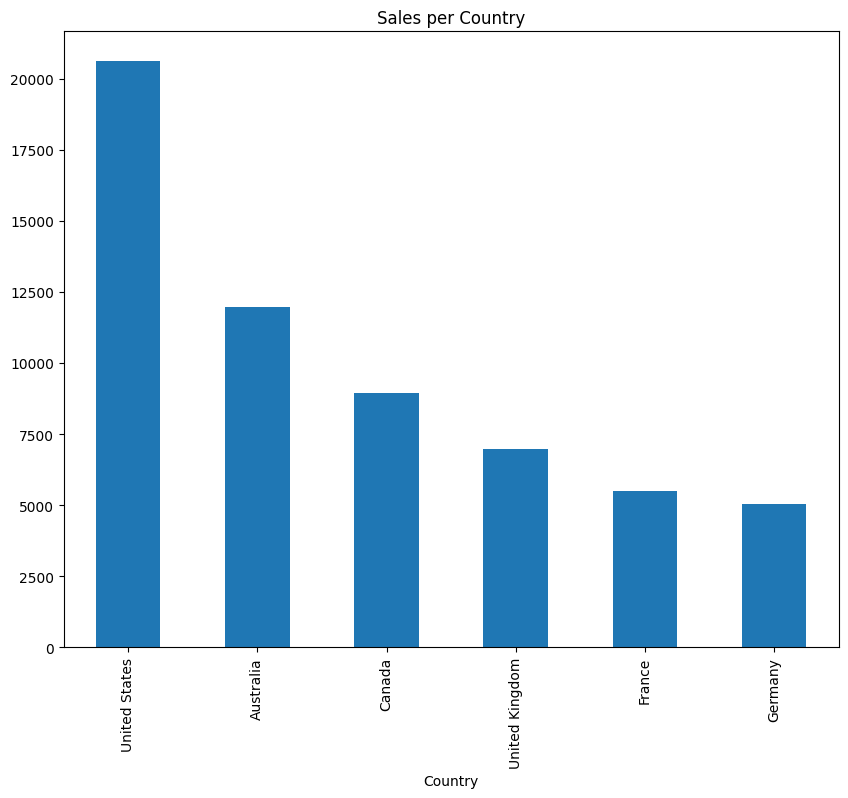

In [49]:
# Which country has the most sales quantity of sales?
#Top Countries by Sales Quantity
country_sales = sales.groupby('Country')['Order_Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
country_sales.plot(kind='bar', title='Sales per Country')
plt.show()

List of unique products sold:
['Fender Set - Mountain' 'Classic Vest, L' 'Touring-1000 Yellow, 54'
 'LL Road Tire' 'Mountain Tire Tube' 'Road Bottle Cage'
 'Patch Kit/8 Patches' 'Road-150 Red, 62' 'Road Tire Tube'
 'Road-650 Black, 62' 'Mountain-100 Silver, 48' 'Hydration Pack - 70 oz.'
 'Water Bottle - 30 oz.' 'Road-550-W Yellow, 42' 'Road-150 Red, 56'
 'Road-250 Black, 44' 'Mountain-200 Black, 46' 'Road-250 Black, 52'
 'Sport-100 Helmet, Black' 'Mountain-200 Silver, 38' 'Road-750 Black, 44'
 'Long-Sleeve Logo Jersey, S' 'ML Mountain Tire' 'Mountain-200 Black, 38'
 'Sport-100 Helmet, Blue' 'Long-Sleeve Logo Jersey, M' 'Road-150 Red, 48'
 'Long-Sleeve Logo Jersey, XL' 'Sport-100 Helmet, Red'
 "Women's Mountain Shorts, M" 'Touring Tire Tube' 'HL Mountain Tire'
 'Bike Wash - Dissolver' 'Road-250 Red, 44' 'AWC Logo Cap'
 'Mountain-200 Silver, 42' 'Mountain Bottle Cage'
 'Short-Sleeve Classic Jersey, XL' 'Touring Tire' 'Road-550-W Yellow, 44'
 'HL Road Tire' 'Road-750 Black, 52' 'Road-550-

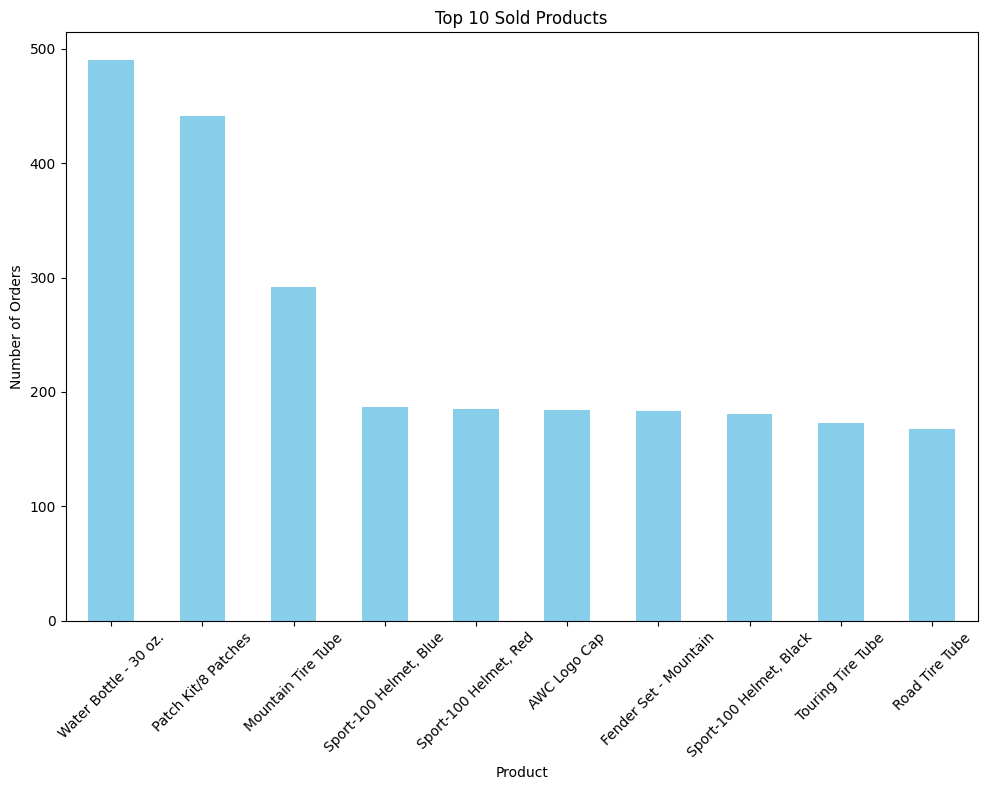

In [50]:
# List of every unique product sold
unique_products = sales['Product'].unique()

# Print the unique products list and count
print("List of unique products sold:")
print(unique_products)
print(f"\nTotal unique products sold: {len(unique_products)}\n")

# Plot Top 10 Sold Products
product_sales = sales['Product'].value_counts().head(10)
product_sales.plot(kind='bar', figsize=(10,8), color='skyblue', title='Top 10 Sold Products')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

List of unique Sub Category sold:
['Fenders', 'Vests', 'Touring Bikes', 'Tires and Tubes', 'Bottles and Cages', ..., 'Caps', 'Gloves', 'Socks', 'Bike Racks', 'Bike Stands']
Length: 17
Categories (17, object): ['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps', ..., 'Socks',
                          'Tires and Tubes', 'Touring Bikes', 'Vests']

Total unique Sub Category sold: 17



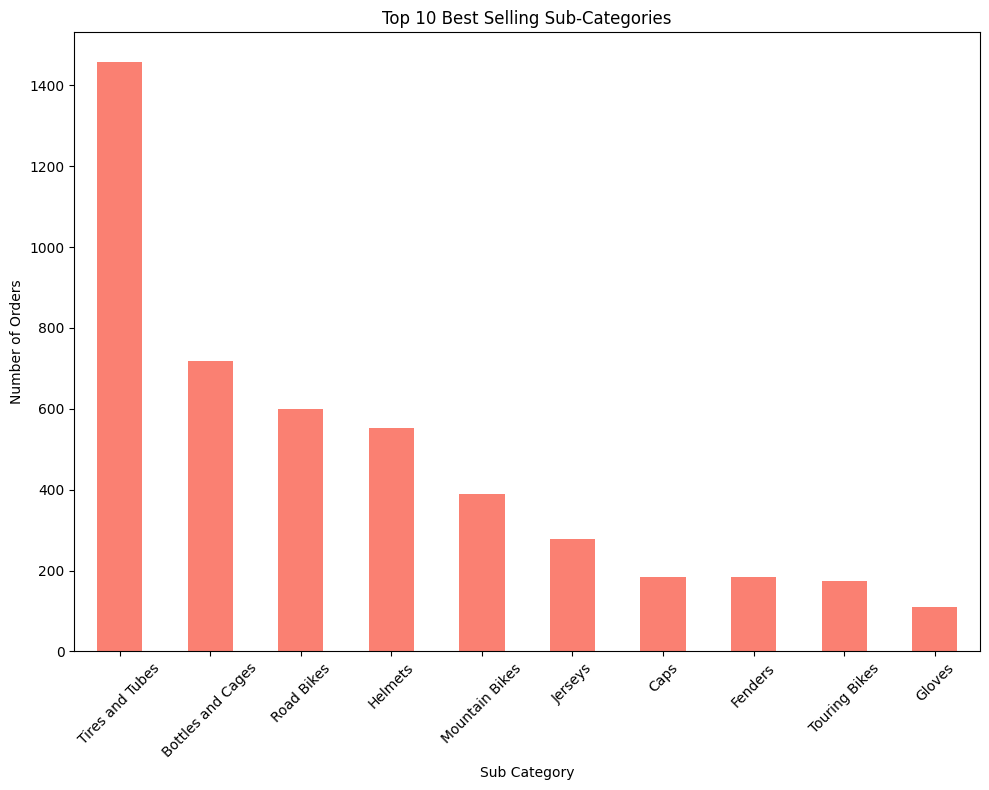

In [51]:
# List of every unique Sub Category sold
unique_Sub_Category = sales['Sub_Category'].unique()

# Print the unique Sub Category list and count
print("List of unique Sub Category sold:")
print(unique_Sub_Category)
print(f"\nTotal unique Sub Category sold: {len(unique_Sub_Category)}\n")

#  Plot Top 10 Best Selling Sub-Categories
subcat_sales = sales['Sub_Category'].value_counts().head(10)
subcat_sales.plot(kind='bar', figsize=(10,8), color='salmon', title='Top 10 Best Selling Sub-Categories')
plt.xlabel('Sub Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Revenue & Profit Analysis

This section explores the financial performance of the bicycle store by analyzing revenue and profit trends, identifying top-selling bikes and high-margin categories, and uncovering key patterns to support data-driven business decisions.


In [52]:
# In which countries were sales made?
sales['Country'].unique()

['United States', 'Canada', 'Australia', 'United Kingdom', 'Germany', 'France']
Categories (6, object): ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom',
                         'United States']

In [53]:
# Sales Per Year
sales.sort_values(['Year'], ascending=False, inplace=True)
sales.head()

Date  Day  Month  Year  Customer_Age Customer_Gender  \
4977 2016-02-10   10      2  2016            35               F   
4    2016-05-16   16      5  2016            35               F   
4972 2016-02-14   14      2  2016            23               F   
6    2016-01-28   28      1  2016            24               M   
4998 2016-01-06    6      1  2016            57               M   

             Country             State Product_Category       Sub_Category  \
4977       Australia          Victoria      Accessories  Bottles and Cages   
4      United States        Washington      Accessories    Tires and Tubes   
4972       Australia          Victoria      Accessories    Tires and Tubes   
6     United Kingdom           England      Accessories  Bottles and Cages   
4998          Canada  British Columbia      Accessories    Tires and Tubes   

      ...    Weekday  Is_Weekend  Season  Profit_per_Unit  Total_Cost  \
4977  ...  Wednesday       False  Winter         1.928571          28   
4     ...     Monday       False  Spring         1.892857          56   
4972  ...     Sunday        True  Winter         0.578947          19   
6     ...   Thursday       False  Winter         5.666667          45   
4998  ...  Wednesday       False  Winter         1.000000          16   

      Order_Value Gross_Profit_Margin Age_Group Customer_Segment  \
4977           70            0.490909     26-35                0   
4             140            0.486239     26-35                0   
4972           38            0.366667     18-25                0   
6             135            0.653846     18-25                0   
4998           32            0.500000     51-65                0   

      Revenue_Group  
4977           <10K  
4              <10K  
4972           <10K  
6              <10K  
4998           <10K  

[5 rows x 28 columns]

In [54]:
# Sorting and Index Reset
sales = sales.sort_values(by='Date', ascending=True).reset_index(drop=True)
sales.head()

Date  Day  Month  Year  Customer_Age Customer_Gender         Country  \
0 2011-01-03    3      1  2011            42               F       Australia   
1 2011-01-09    9      1  2011            17               F          Canada   
2 2011-01-14   14      1  2011            31               F  United Kingdom   
3 2011-01-17   17      1  2011            34               M   United States   
4 2011-01-17   17      1  2011            44               F   United States   

              State Product_Category Sub_Category  ... Weekday  Is_Weekend  \
0          Victoria            Bikes   Road Bikes  ...  Monday       False   
1  British Columbia            Bikes   Road Bikes  ...  Sunday        True   
2           England            Bikes   Road Bikes  ...  Friday       False   
3        California            Bikes   Road Bikes  ...  Monday       False   
4        California            Bikes   Road Bikes  ...  Monday       False   

   Season  Profit_per_Unit  Total_Cost  Order_Value Gross_Profit_Margin  \
0  Winter             83.0         344          540            0.194379   
1  Winter            601.0        1083         1701            0.356888   
2  Winter            174.0         344          540            0.335907   
3  Winter           1335.0        2171         3578            0.380776   
4  Winter           1335.5        8684        14312            0.380864   

  Age_Group Customer_Segment  Revenue_Group  
0     36-50                0           <10K  
1       <18                1           <10K  
2     26-35                0           <10K  
3     26-35                1           <10K  
4     36-50                2           >10K  

[5 rows x 28 columns]

In [55]:
# What is the breakdown of yearly sales volume and total profit?

# Count number of orders per year
yearly_sales = sales['Year'].value_counts().sort_index()

# Calculate total profit per year
yearly_profit = sales.groupby('Year')['Profit'].sum()

# Create a figure with 2 rows and 2 columns (side-by-side plots)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# --- Top Left: Pie chart of sales count per year ---
yearly_sales.plot.pie(
    ax=axes[0, 0],
    autopct='%1.1f%%',
    title='Sales per Year (Pie)',
    ylabel='',
    legend=False,
    colors=plt.cm.Paired.colors
)

# --- Top Right: Bar chart of sales count per year ---
yearly_sales.plot.bar(
    ax=axes[0, 1],
    title='Sales per Year (Bar)',
    color='skyblue'
)
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Orders')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

# --- Bottom Left: Pie chart of profit per year ---
yearly_profit.plot.pie(
    ax=axes[1, 0],
    autopct='%1.1f%%',
    title='Total Profit per Year (Pie)',
    ylabel='',
    legend=False,
    colors=plt.cm.Paired.colors
)

# --- Bottom Right: Bar chart of profit per year ---
yearly_profit.plot.bar(
    ax=axes[1, 1],
    title='Total Profit per Year (Bar)',
    color='salmon'
)
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Total Profit')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

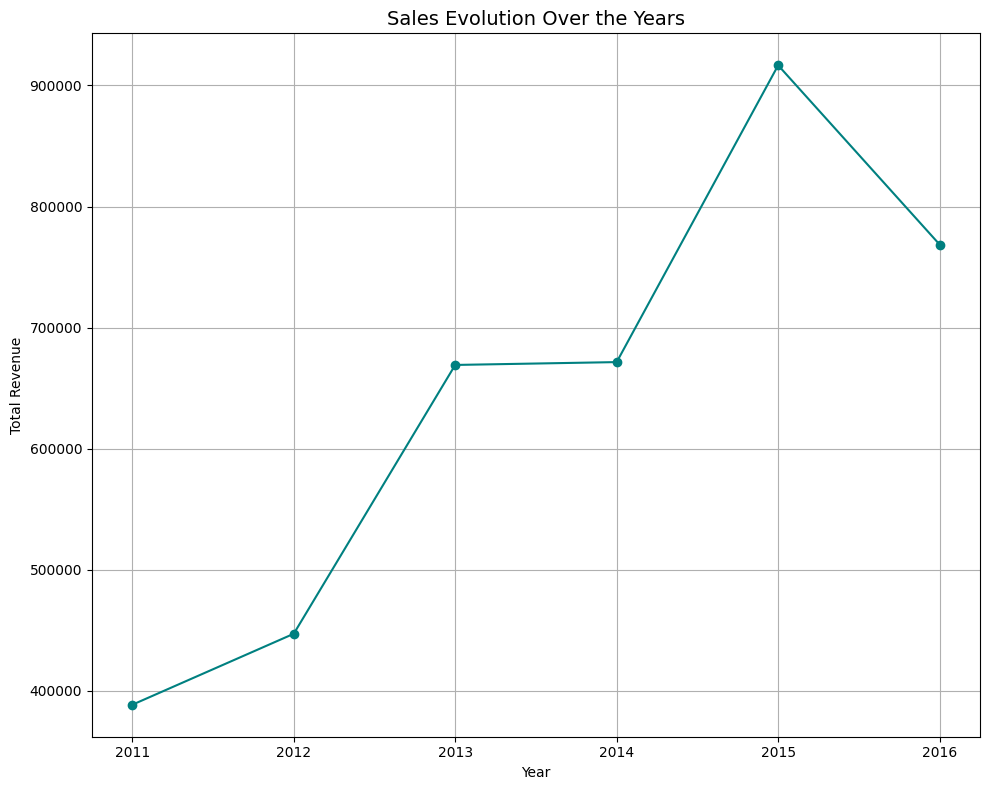

In [56]:
# How has total revenue evolved over the years?

# Group data by year and sum the revenue
yearly_revenue = sales.groupby('Year')['Revenue'].sum().sort_index()

# Line plot to show sales evolution over the years
plt.figure(figsize=(10, 8))
plt.plot(yearly_revenue.index, yearly_revenue.values, marker='o', linestyle='-', color='teal')

# Add title and labels
plt.title('Sales Evolution Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(yearly_revenue.index)  # Show each year on x-axis
plt.tight_layout()
plt.show()

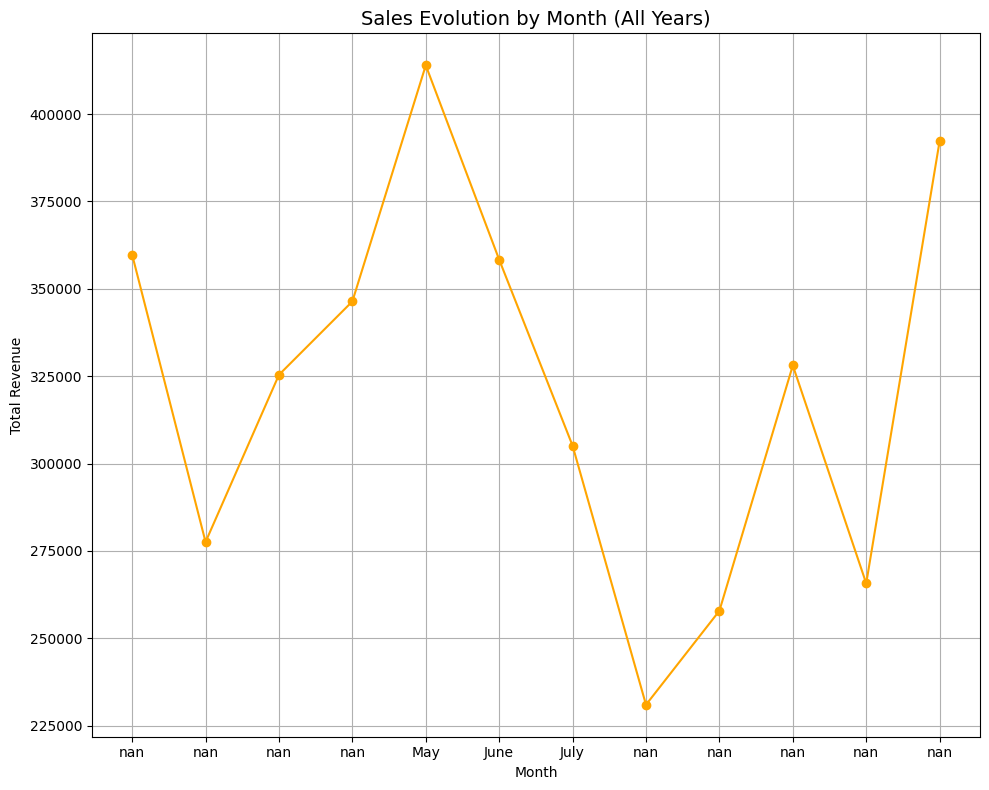

In [57]:
# sales evolve through the Months

# Group data by month number and sum revenue
monthly_revenue = sales.groupby('Month')['Revenue'].sum().sort_index()

# Create a list of unique month names ordered by month number
month_names_ordered = sales[['Month', 'Month_Name']].drop_duplicates().sort_values('Month')['Month_Name'].values

# Create numeric x-axis values for plotting
x = np.arange(len(month_names_ordered))

plt.figure(figsize=(10, 8))

# Plot total revenue with markers and orange line
plt.plot(x, monthly_revenue.values, marker='o', linestyle='-', color='orange')

# Set x-axis ticks to month names for readability
plt.xticks(x, month_names_ordered)

# Add title and axis labels
plt.title('Sales Evolution by Month (All Years)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue')

# Enable grid for better visualization
plt.grid(True)

plt.tight_layout()
plt.show()

In [58]:
# Increase 50 U$S revenue to every sale
sales['Revenue'] += 50

In [59]:
# Get the top-5 sales with the highest revenue
sales.sort_values(by='Revenue', ascending=False).head(5)

Date  Day  Month  Year  Customer_Age Customer_Gender  \
29   2011-03-27   27      3  2011            24               M   
4    2011-01-17   17      1  2011            44               F   
3901 2016-01-28   28      1  2016            34               M   
3762 2016-01-09    9      1  2016            40               F   
3563 2015-12-11   11     12  2015            44               M   

            Country             State Product_Category Sub_Category  ...  \
29    United States        California            Bikes   Road Bikes  ...   
4     United States        California            Bikes   Road Bikes  ...   
3901         Canada  British Columbia            Bikes   Road Bikes  ...   
3762         Canada  British Columbia            Bikes   Road Bikes  ...   
3563         Canada  British Columbia            Bikes   Road Bikes  ...   

       Weekday  Is_Weekend  Season  Profit_per_Unit  Total_Cost  Order_Value  \
29      Sunday        True  Spring      1335.500000        8684        14312   
4       Monday       False  Winter      1335.500000        8684        14312   
3901  Thursday       False  Winter      1371.333333        6513        10734   
3762  Saturday        True  Winter      1371.333333        6513        10734   
3563    Friday       False  Winter      1371.333333        6513        10734   

     Gross_Profit_Margin Age_Group Customer_Segment  Revenue_Group  
29              0.380864     18-25                2           >10K  
4               0.380864     36-50                2           >10K  
3901            0.387127     26-35                2           >10K  
3762            0.387127     36-50                2           >10K  
3563            0.387127     36-50                2           >10K  

[5 rows x 28 columns]

In [60]:
# Get the sale with the highest revenue
highest_revenue_sale = sales.loc[sales['Revenue'].idxmax()]
print(highest_revenue_sale)

Date                   2011-01-17 00:00:00
Day                                     17
Month                                    1
Year                                  2011
Customer_Age                            44
Customer_Gender                          F
Country                      United States
State                           California
Product_Category                     Bikes
Sub_Category                    Road Bikes
Product                   Road-150 Red, 62
Order_Quantity                           4
Unit_Cost                             2171
Unit_Price                            3578
Profit                                5342
Revenue                              14076
YearMonth                          2011-01
Month_Name                             NaN
Weekday                             Monday
Is_Weekend                           False
Season                              Winter
Profit_per_Unit                     1335.5
Total_Cost                            8684
Order_Value

In [61]:
# Add 7.2% TAX on every sale Unit_Price within United States
us_mask = sales['Country'] == 'United States'
sales['Unit_Price_Taxed'] = sales['Unit_Price']
sales.loc[us_mask, 'Unit_Price_Taxed'] *= 1.072

sales.head()

<ipython-input-61-1897445302>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.835616e+03 3.835616e+03 2.618896e+03 ... 3.216000e+01 5.360000e+00
 2.144000e+00]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales.loc[us_mask, 'Unit_Price_Taxed'] *= 1.072


Date  Day  Month  Year  Customer_Age Customer_Gender         Country  \
0 2011-01-03    3      1  2011            42               F       Australia   
1 2011-01-09    9      1  2011            17               F          Canada   
2 2011-01-14   14      1  2011            31               F  United Kingdom   
3 2011-01-17   17      1  2011            34               M   United States   
4 2011-01-17   17      1  2011            44               F   United States   

              State Product_Category Sub_Category  ... Is_Weekend  Season  \
0          Victoria            Bikes   Road Bikes  ...      False  Winter   
1  British Columbia            Bikes   Road Bikes  ...       True  Winter   
2           England            Bikes   Road Bikes  ...      False  Winter   
3        California            Bikes   Road Bikes  ...      False  Winter   
4        California            Bikes   Road Bikes  ...      False  Winter   

   Profit_per_Unit  Total_Cost  Order_Value  Gross_Profit_Margin Age_Group  \
0             83.0         344          540             0.194379     36-50   
1            601.0        1083         1701             0.356888       <18   
2            174.0         344          540             0.335907     26-35   
3           1335.0        2171         3578             0.380776     26-35   
4           1335.5        8684        14312             0.380864     36-50   

  Customer_Segment Revenue_Group  Unit_Price_Taxed  
0                0          <10K           540.000  
1                1          <10K          1701.000  
2                0          <10K           540.000  
3                1          <10K          3835.616  
4                2          >10K          3835.616  

[5 rows x 29 columns]

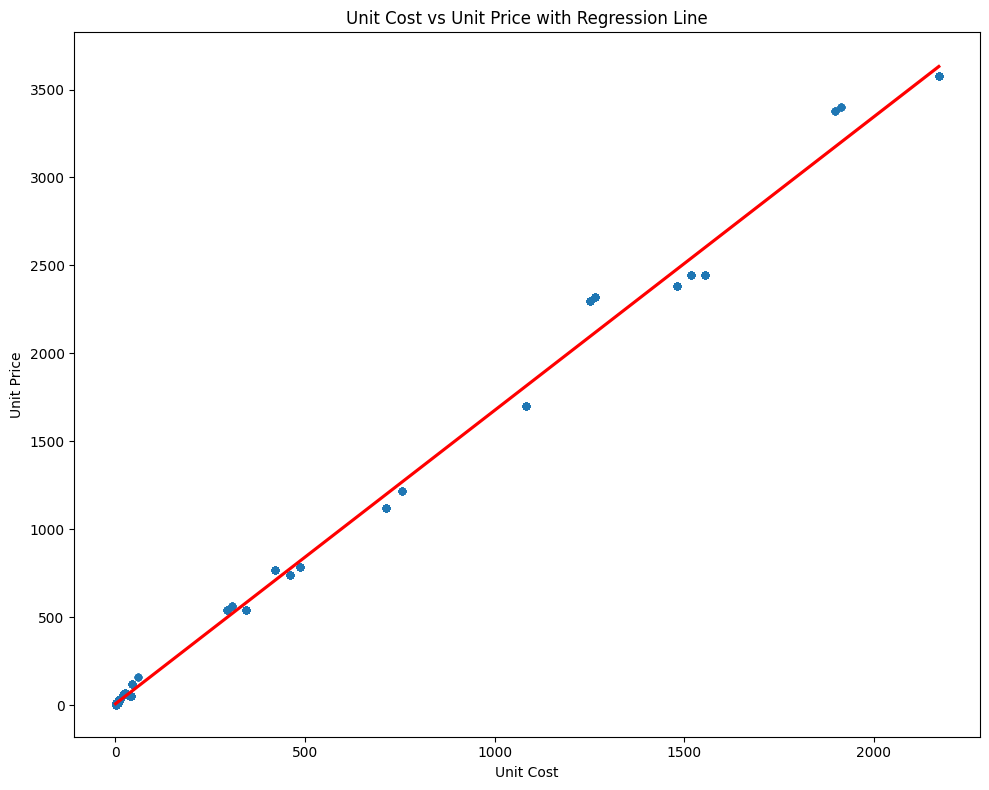

In [62]:
# Relationship between Unit Cost and Unit Price
plt.figure(figsize=(10, 8))
sns.regplot(x='Unit_Cost', y='Unit_Price', data=sales, scatter_kws={'s':20}, line_kws={'color':'red'})
plt.title('Unit Cost vs Unit Price with Regression Line')
plt.xlabel('Unit Cost')
plt.ylabel('Unit Price')
plt.tight_layout()
plt.show()

In [63]:
# Top 10 Products with Low or Negative Profit (Profit < 50)
low_profit_products = sales[sales['Profit'] < 50]['Product'].value_counts().head(10)

# Top 10 Products with Highest Profit
top_profit_products = sales.groupby('Product')['Profit'].sum().sort_values(ascending=False).head(10)

# Print the results
print("Top 10 Products with Low or Negative Profit:")
print(low_profit_products)

print("\nTop 10 Products with Highest Total Profit:")
print(top_profit_products)

# Plot Low/Negative Profit Products
plt.figure(figsize=(10, 8))
low_profit_products.plot(kind='bar', color='tomato')
plt.title('Top 10 Products with Low or Negative Profit')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Highest Profit Products
plt.figure(figsize=(10, 8))
top_profit_products.plot(kind='bar', color='seagreen')
plt.title('Top 10 Products with Highest Total Profit')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Products with Low or Negative Profit:
Product
Patch Kit/8 Patches        441
Water Bottle - 30 oz.      331
Mountain Tire Tube         201
AWC Logo Cap               177
Road Tire Tube             113
Touring Tire Tube          106
Mountain Bottle Cage        38
Road Bottle Cage            35
Sport-100 Helmet, Black     24
Bike Wash - Dissolver       23
Name: count, dtype: int64

Top 10 Products with Highest Total Profit:
Product
Road-150 Red, 62           71664
Mountain-200 Black, 38     68083
Mountain-200 Black, 42     62786
Sport-100 Helmet, Blue     55805
Road-150 Red, 52           53042
Mountain-200 Silver, 38    51893
Sport-100 Helmet, Red      50235
Sport-100 Helmet, Black    50098
Road-150 Red, 56           47966
Mountain-200 Silver, 42    36636
Name: Profit, dtype: int64


<ipython-input-64-2275931124>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_profit = sales.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)
<ipython-input-64-2275931124>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_unit_profit = sales.groupby('Product_Category')['Profit_per_Unit'].mean().sort_values(ascending=False)


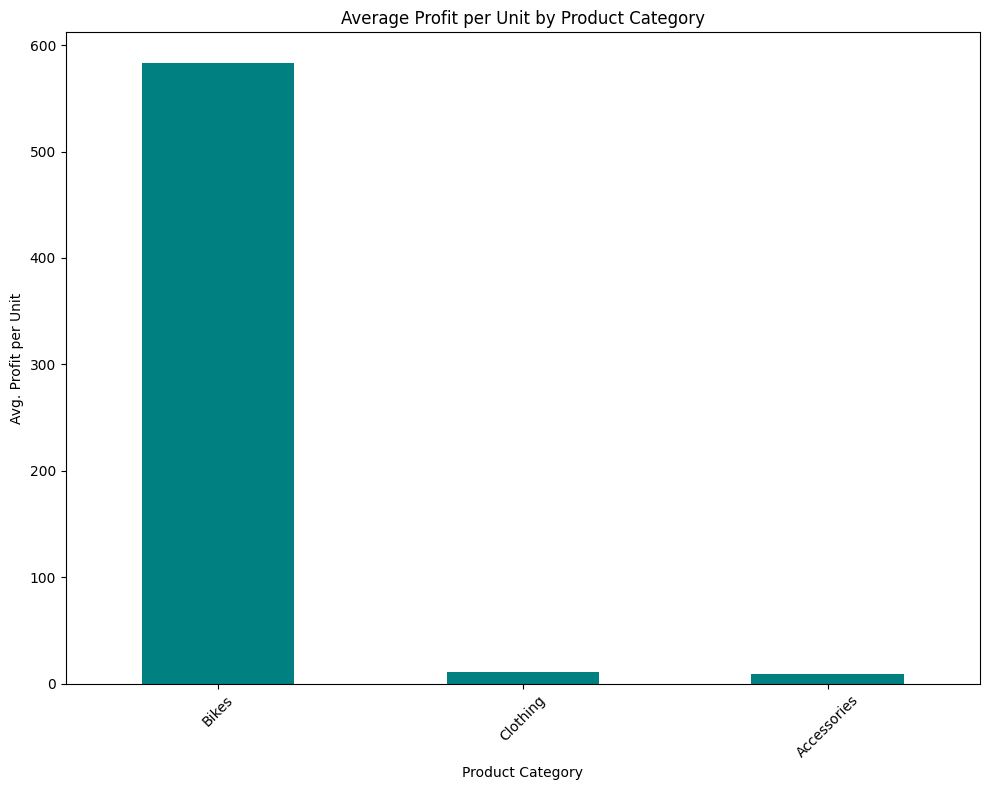

<ipython-input-64-2275931124>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subcat_profit = sales.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).head(15)


In [64]:
# Total Profit and Profit per Unit by Product Category and Sub-Category

# --- Total Profit per Product Category ---
category_profit = sales.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)

# --- Average Profit per Unit per Product Category ---
category_unit_profit = sales.groupby('Product_Category')['Profit_per_Unit'].mean().sort_values(ascending=False)

# Plot total profit per category
plt.figure(figsize=(10, 8))
category_profit.plot(kind='bar', color='slateblue')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot average profit per unit per category
plt.figure(figsize=(10, 8))
category_unit_profit.plot(kind='bar', color='teal')
plt.title('Average Profit per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Avg. Profit per Unit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Total Profit per Sub-Category (Top 15) ---
subcat_profit = sales.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).head(15)

# Plot total profit per sub-category
plt.figure(figsize=(10, 8))
subcat_profit.plot(kind='bar', color='darkorange')
plt.title('Top 15 Sub-Categories by Total Profit')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-65-3009778030>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_profit = sales.groupby('Customer_Gender')['Profit'].sum()


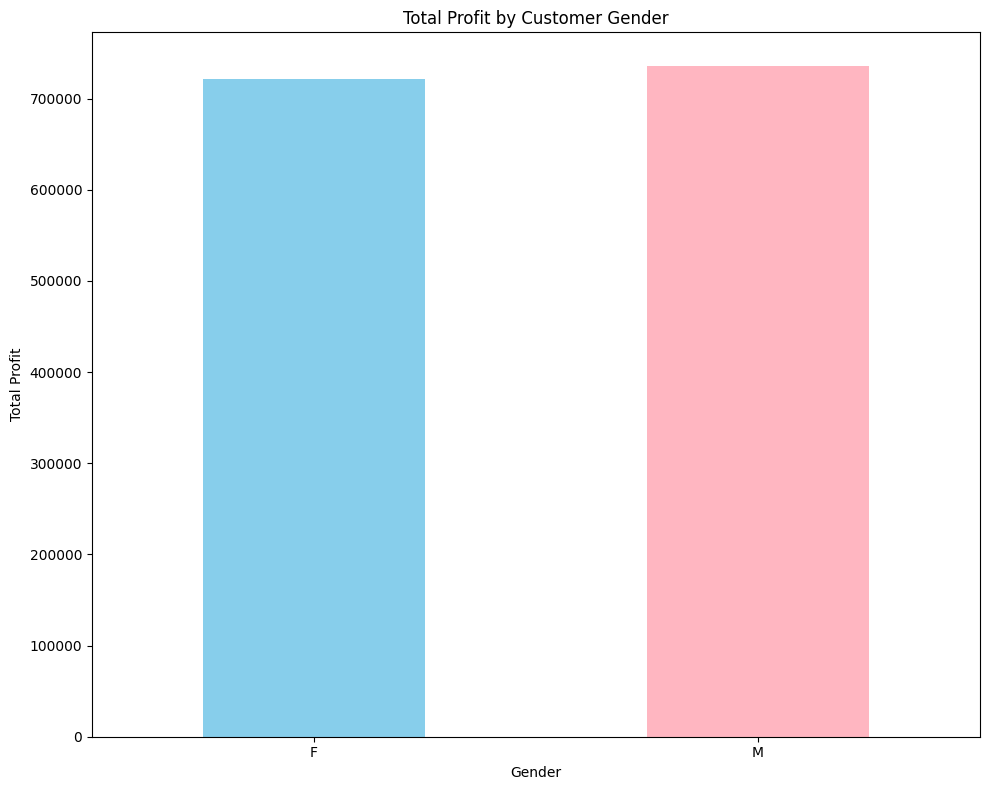

In [65]:
# Total Profit by Gender
gender_profit = sales.groupby('Customer_Gender')['Profit'].sum()

# Plot
plt.figure(figsize=(10, 8))
gender_profit.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Total Profit by Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [66]:
# Revenue by Product Category and State using Heatmap

# Group by State and Product Category, then pivot the data
sales_by_state_category = sales.groupby(['State', 'Product_Category'])['Revenue'].sum().unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    sales_by_state_category,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt='.0f'
)
plt.title('Revenue Heatmap: Product Category by State')
plt.xlabel('Product Category')
plt.ylabel('State')
plt.tight_layout()
plt.show()

<ipython-input-66-1760765563>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_state_category = sales.groupby(['State', 'Product_Category'])['Revenue'].sum().unstack().fillna(0)


<ipython-input-67-1779417619>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_category_sales = sales.groupby(['Season', 'Product_Category'])['Revenue'].sum().unstack()


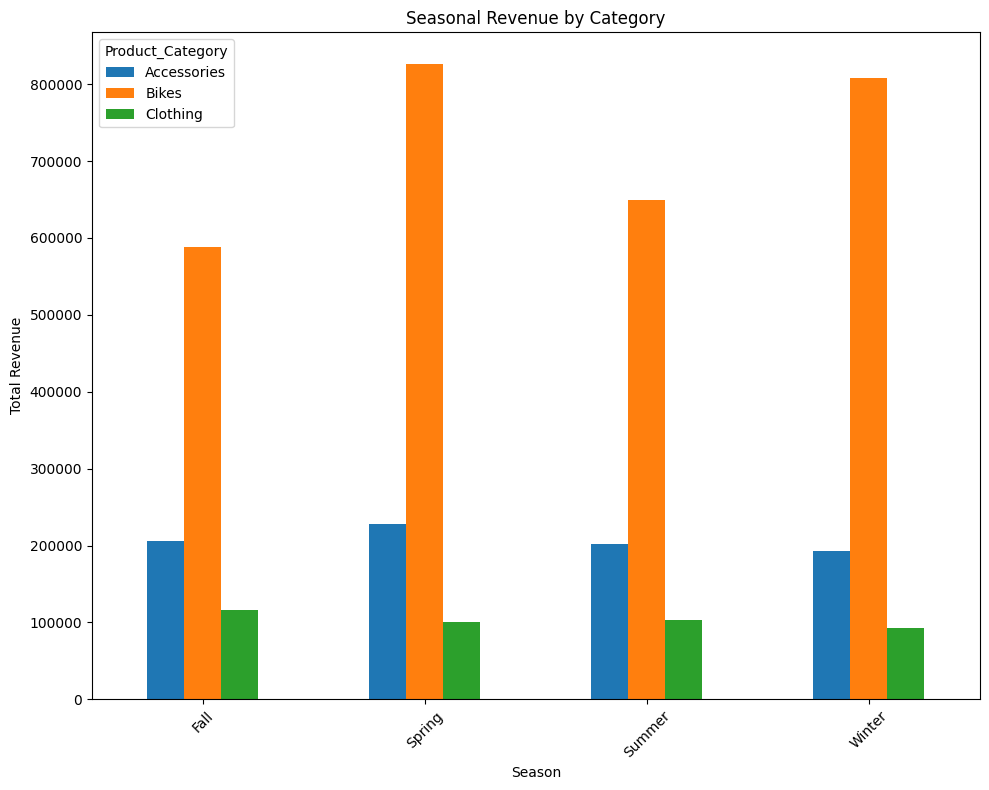

In [67]:
# Revenue by Season and Product Category
season_category_sales = sales.groupby(['Season', 'Product_Category'])['Revenue'].sum().unstack()

# Plot a bar chart showing revenue for each product category across different seasons
season_category_sales.plot(kind='bar', figsize=(10, 8), title='Seasonal Revenue by Category')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

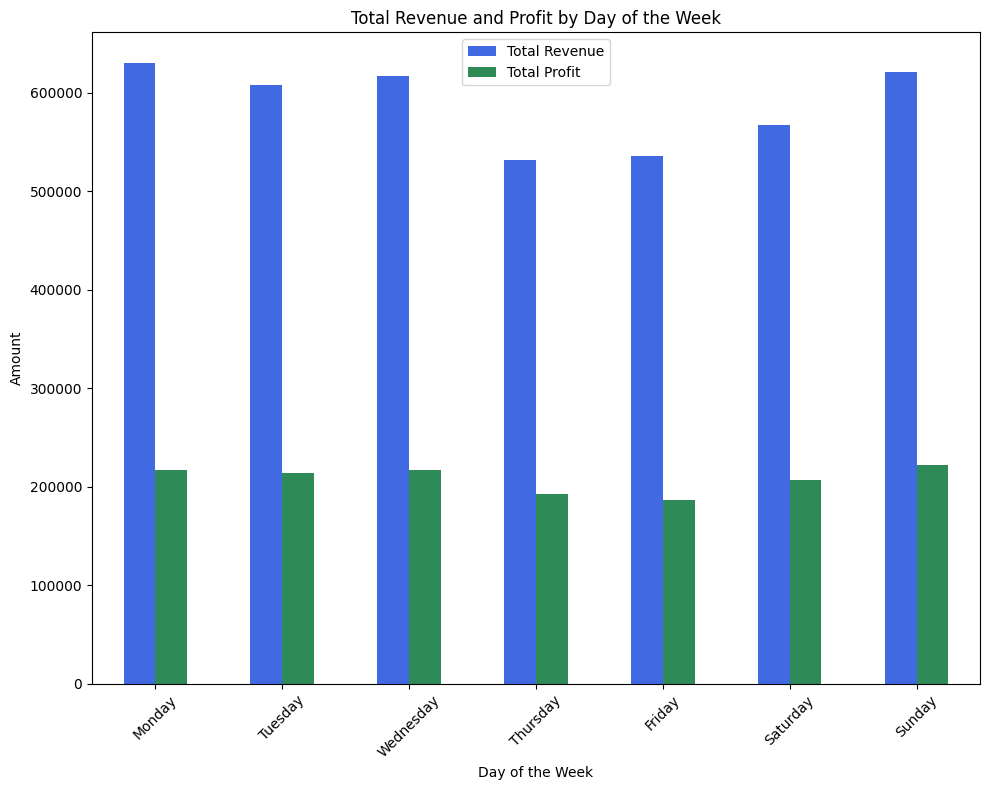

In [68]:
# Revenue & Profit Analysis: Focus on Total Revenue and Profit by Weekday

# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by weekday and calculate total revenue and profit
revenue_profit_stats = sales.groupby('Weekday').agg({
    'Revenue': 'sum',
    'Profit': 'sum'  # Assuming 'Profit' column exists in your data
}).reindex(weekday_order)

# Plot total revenue and profit by weekday
ax = revenue_profit_stats.plot(
    kind='bar',
    figsize=(10, 8),
    color=['royalblue', 'seagreen'],
    title='Total Revenue and Profit by Day of the Week'
)

plt.xlabel('Day of the Week')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(['Total Revenue', 'Total Profit'])
plt.tight_layout()
plt.show()

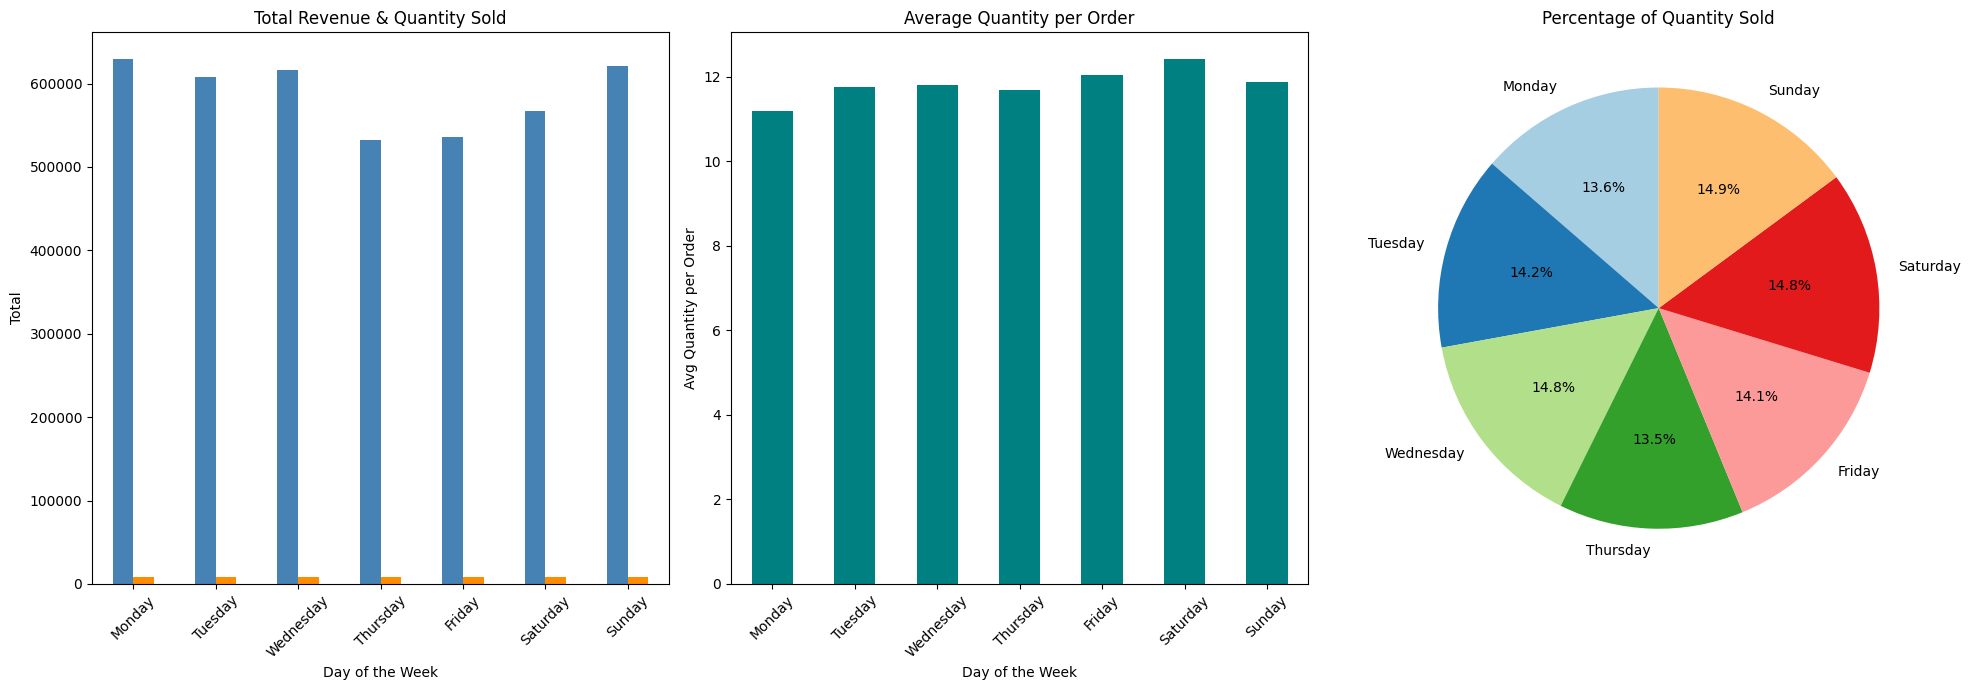

In [69]:
# Revenue & Quantity Sold by Weekday with Avg Quantity per Order and Pie
# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 1. Total Revenue and Quantity Sold by Day of the Week
weekday_stats = sales.groupby('Weekday').agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'  # Total quantity sold
}).reindex(weekday_order)

plt.figure(figsize=(20, 7))
ax1 = plt.subplot(1, 3, 1)
weekday_stats.plot(
    kind='bar',
    color=['steelblue', 'darkorange'],
    ax=ax1,
    legend=False,
    title='Total Revenue & Quantity Sold'
)
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Total')
ax1.tick_params(axis='x', rotation=45)

# 2. Average Quantity per Order by Day of the Week
avg_order_stats = sales.groupby('Weekday').agg(
    Total_Quantity=('Order_Quantity', 'sum'),
    Number_of_Orders=('Order_Quantity', 'count')
).assign(
    Avg_Quantity_Per_Order=lambda df: df['Total_Quantity'] / df['Number_of_Orders']
).reindex(weekday_order)

ax2 = plt.subplot(1, 3, 2)
avg_order_stats['Avg_Quantity_Per_Order'].plot(
    kind='bar',
    color='teal',
    ax=ax2,
    title='Average Quantity per Order'
)
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Avg Quantity per Order')
ax2.tick_params(axis='x', rotation=45)

# 3. Percentage of Total Quantity Sold by Day of the Week (Pie Chart)
weekday_qty_pct = sales.groupby('Weekday')['Order_Quantity'].sum().reindex(weekday_order)
weekday_qty_pct = weekday_qty_pct / weekday_qty_pct.sum() * 100  # Percentage

ax3 = plt.subplot(1, 3, 3)
ax3.pie(
    weekday_qty_pct,
    labels=weekday_qty_pct.index,
    autopct='%1.1f%%',
    colors=plt.cm.Paired.colors,
    startangle=90
)
ax3.set_title('Percentage of Quantity Sold')

plt.tight_layout()
plt.show()

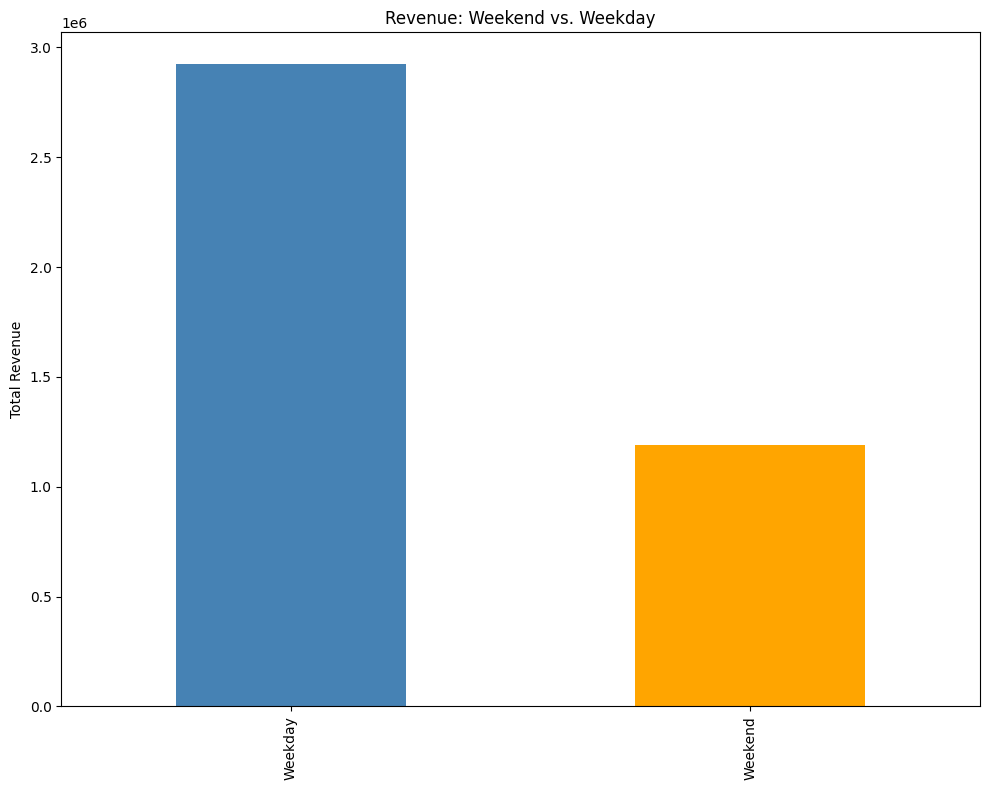

In [70]:
# Group by weekend vs. weekday and calculate total revenue
weekend_comparison = sales.groupby('Is_Weekend')['Revenue'].sum()

# Rename index values for clarity (False = Weekday, True = Weekend)
weekend_comparison.index = ['Weekday', 'Weekend']

# Plot revenue comparison as a bar chart
weekend_comparison.plot(
    kind='bar',
    title='Revenue: Weekend vs. Weekday',
    color=['steelblue', 'orange'],
    figsize=(10, 8)
)

# Add labels and layout adjustments
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

<ipython-input-71-3706228214>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_stats = sales.groupby('Product_Category').agg({


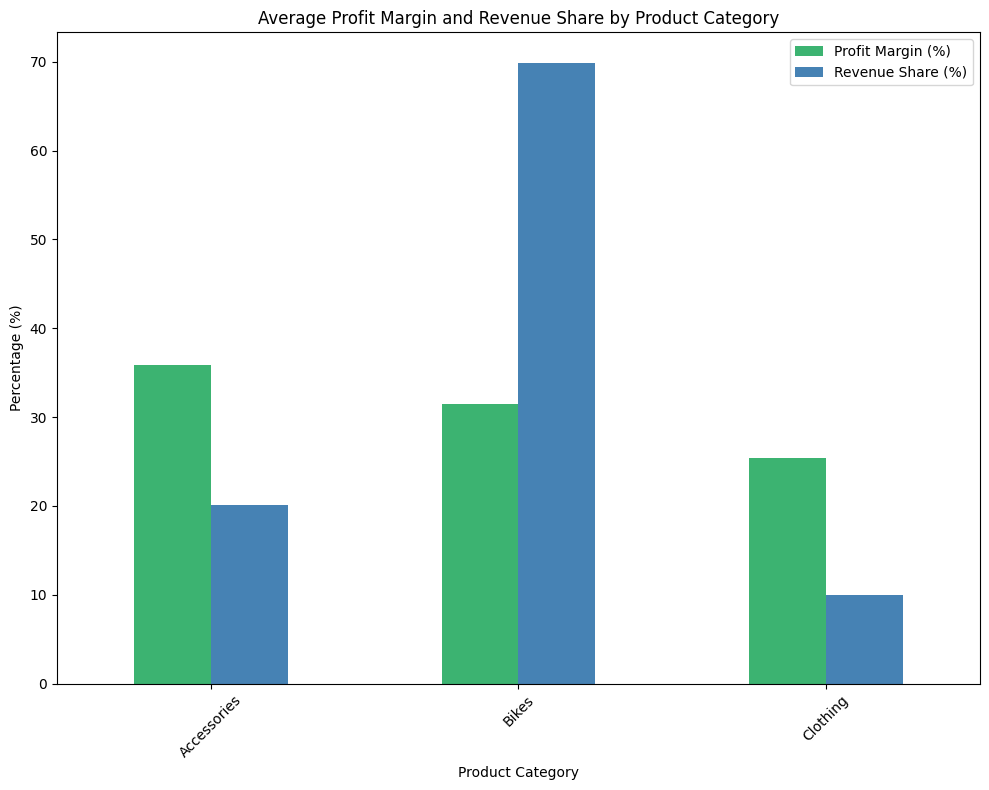

In [71]:
# Calculate profit margin as a percentage
sales['Profit_Margin'] = (sales['Profit'] / (sales['Revenue'] + 1e-9)) * 100  # Add a small epsilon (1e-9) to prevent division by zero errors


# Group by product category: average profit margin and total revenue
category_stats = sales.groupby('Product_Category').agg({
    'Profit_Margin': 'mean',
    'Revenue': 'sum'
})

# Calculate revenue share (%) of each category
total_revenue = category_stats['Revenue'].sum()
category_stats['Revenue_Share'] = (category_stats['Revenue'] / total_revenue) * 100

# Plot side-by-side bar chart for Profit Margin and Revenue Share
category_stats[['Profit_Margin', 'Revenue_Share']].plot(
    kind='bar',
    figsize=(10, 8),
    color=['mediumseagreen', 'steelblue']
)

plt.title('Average Profit Margin and Revenue Share by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(['Profit Margin (%)', 'Revenue Share (%)'])
plt.tight_layout()
plt.show()

##Trend Analysis & Forecasting

In [113]:
# Monthly Summary Preparation
# Aggregate monthly data: total orders, revenue, and profit
monthly_summary = sales.groupby('YearMonth').agg({
    'Order_Quantity': 'sum',   # Total number of units sold
    'Revenue': 'sum',          # Total monthly revenue
    'Profit': 'sum'            # Total monthly profit
}).reset_index()

# Rename column to match Prophet format
monthly_summary.rename(columns={'Order_Quantity': 'Orders'}, inplace=True)

# Convert 'YearMonth' column to datetime
monthly_summary['YearMonth'] = pd.to_datetime(monthly_summary['YearMonth'])
monthly_summary.set_index('YearMonth', inplace=True)

In [114]:
monthly_summary['Cumulative_Revenue'] = monthly_summary['Revenue'].cumsum()
monthly_summary['Cumulative_Profit'] = monthly_summary['Profit'].cumsum()
monthly_summary['Revenue_MoM_Growth'] = monthly_summary['Revenue'].pct_change() * 100
monthly_summary['Profit_MoM_Growth'] = monthly_summary['Profit'].pct_change() * 100

In [115]:
season_encoding = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}
sales['Season_encoded'] = sales['Season'].map(season_encoding)

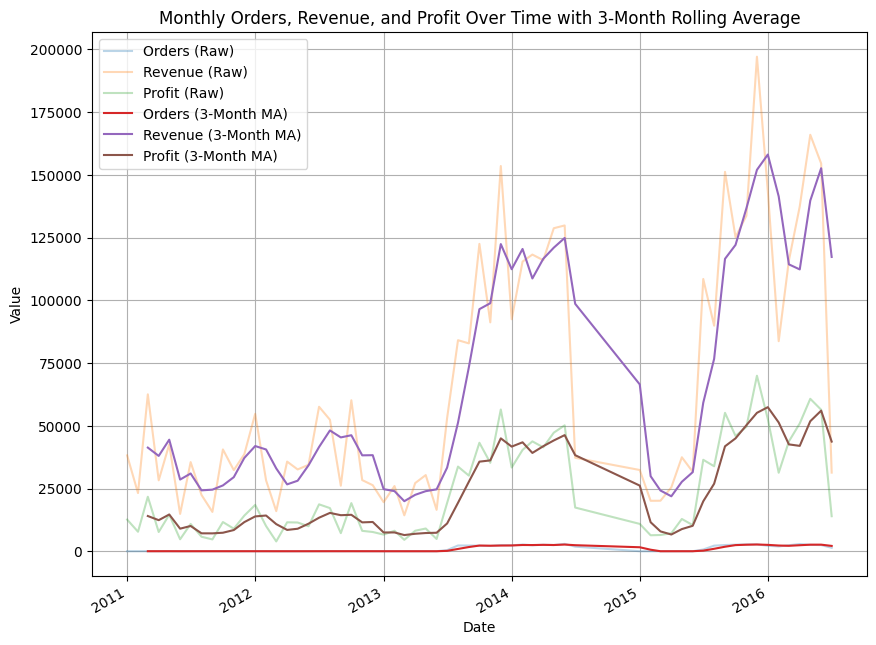

In [121]:
# Monthly Trend Analysis: Orders, Revenue, and Profit with 3-Month Rolling Average

# Calculate 3-month rolling average for smoothing
rolling_summary = monthly_summary[['Orders', 'Revenue', 'Profit']].rolling(window=3).mean()

plt.figure(figsize=(10, 8))

# Plot raw monthly data with lower opacity
monthly_summary[['Orders', 'Revenue', 'Profit']].plot(ax=plt.gca(), alpha=0.3, legend=False)

# Plot rolling average to highlight trends
rolling_summary.plot(ax=plt.gca())
plt.title('Monthly Orders, Revenue, and Profit Over Time with 3-Month Rolling Average')
plt.ylabel('Value')
plt.xlabel('Date')
plt.grid(True)
plt.legend(['Orders (Raw)', 'Revenue (Raw)', 'Profit (Raw)',
            'Orders (3-Month MA)', 'Revenue (3-Month MA)', 'Profit (3-Month MA)'])
plt.show()

Season
Spring    1154683
Winter    1093055
Summer     953956
Fall       909831
Name: Revenue, dtype: int64


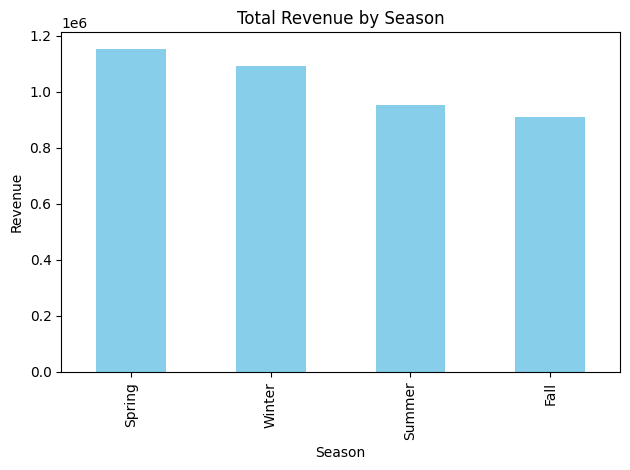

In [99]:
# Seasonal Sales Trend
seasonal_sales = sales.groupby('Season')['Revenue'].sum().sort_values(ascending=False)
print(seasonal_sales)

seasonal_sales.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Season')
plt.ylabel('Revenue')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

### ⚠️ Note:
The following comparison between **Prophet** and **Random Forest** illustrates general performance trends rather than a strict benchmark.

- **Prophet** was trained on the full time series and forecasts into the future based on temporal patterns.  
- **Random Forest** was trained and evaluated using randomly shuffled train/test splits, relying on feature-based learning rather than temporal continuity.

Therefore, the evaluation below provides an **illustrative overview** of how each model behaves in terms of forecasting accuracy and trend recognition — **not** a direct apples-to-apples comparison.



In [122]:
# General function to perform Prophet forecasting and visualization

def prophet_forecast(monthly_df, column_name, periods=6):
    # Prepare data for Prophet
    df_prophet = monthly_df[[column_name]].reset_index().rename(columns={'YearMonth': 'ds', column_name: 'y'})

    # Create and train the model
    model = Prophet()
    model.fit(df_prophet)

    # Create future dataframe
    future = model.make_future_dataframe(periods=periods, freq='ME')

    # Generate forecast
    forecast = model.predict(future)

    # Plot forecast
    model.plot(forecast)
    plt.title(f'Forecasted {column_name}')
    plt.tight_layout()
    plt.show()

    # Plot forecast components
    model.plot_components(forecast)
    plt.tight_layout()
    plt.show()

    # Evaluate forecast performance on historical period only
    df_merged = df_prophet.merge(forecast[['ds', 'yhat']], on='ds')
    mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
    rmse = np.sqrt(mean_squared_error(df_merged['y'], df_merged['yhat']))

    print(f"Forecast Evaluation for {column_name}: MAE={mae:.2f}, RMSE={rmse:.2f}")

    return forecast, df_merged

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzebckesw/6k32n_jp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzebckesw/etzs6dsq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34154', 'data', 'file=/tmp/tmpzebckesw/6k32n_jp.json', 'init=/tmp/tmpzebckesw/etzs6dsq.json', 'output', 'file=/tmp/tmpzebckesw/prophet_model3t4ukdd6/prophet_model-20250616113129.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:31:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


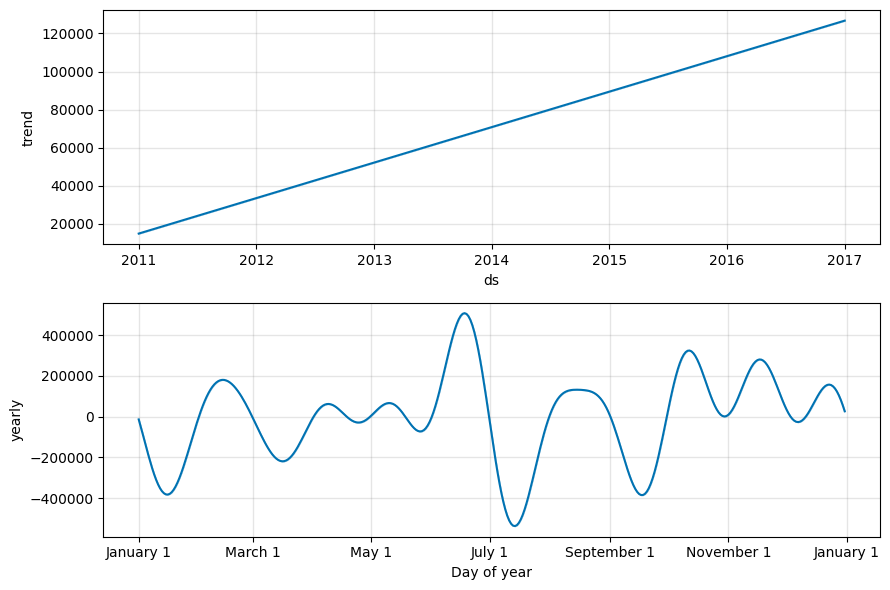

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzebckesw/xgs9gq3_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzebckesw/1mdrtbh6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36178', 'data', 'file=/tmp/tmpzebckesw/xgs9gq3_.json', 'init=/tmp/tmpzebckesw/1mdrtbh6.json', 'output', 'file=/tmp/tmpzebckesw/prophet_modelnjw49io6/prophet_model-20250616113130.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:31:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Forecast Evaluation for Revenue: MAE=28472.35, RMSE=34007.43


11:31:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


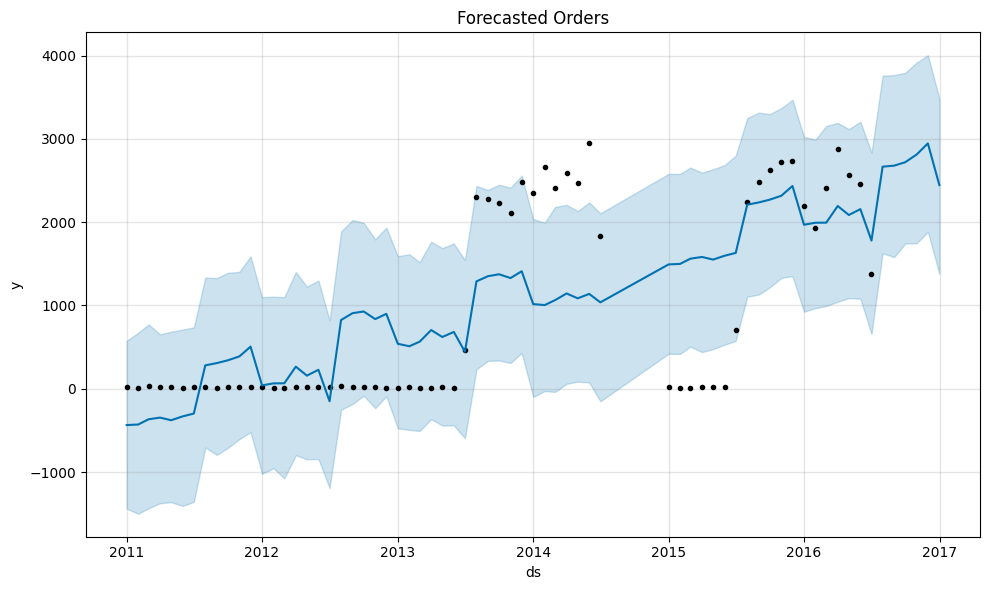

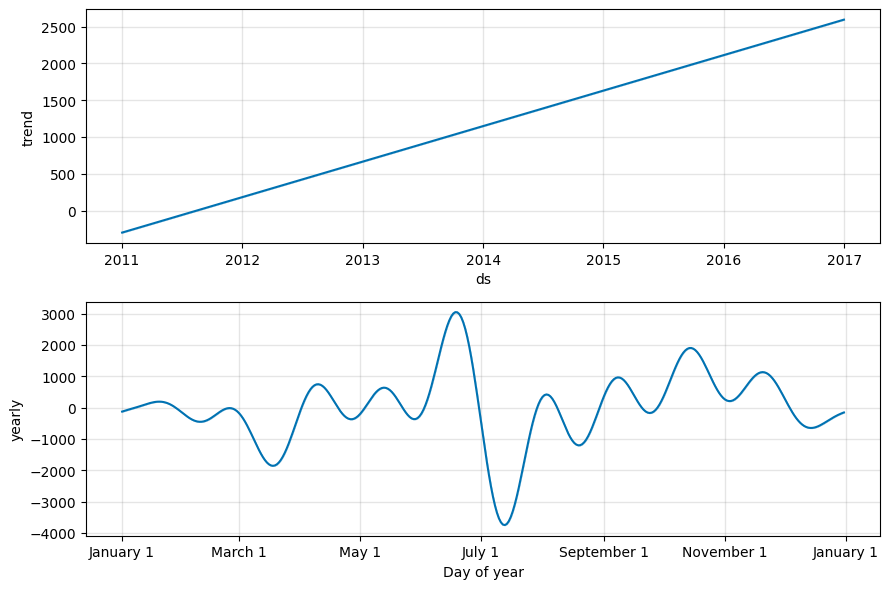

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzebckesw/tfhfnyk8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzebckesw/wc9xy5dx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46127', 'data', 'file=/tmp/tmpzebckesw/tfhfnyk8.json', 'init=/tmp/tmpzebckesw/wc9xy5dx.json', 'output', 'file=/tmp/tmpzebckesw/prophet_model4il4noef/prophet_model-20250616113132.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:31:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast Evaluation for Orders: MAE=672.19, RMSE=831.87


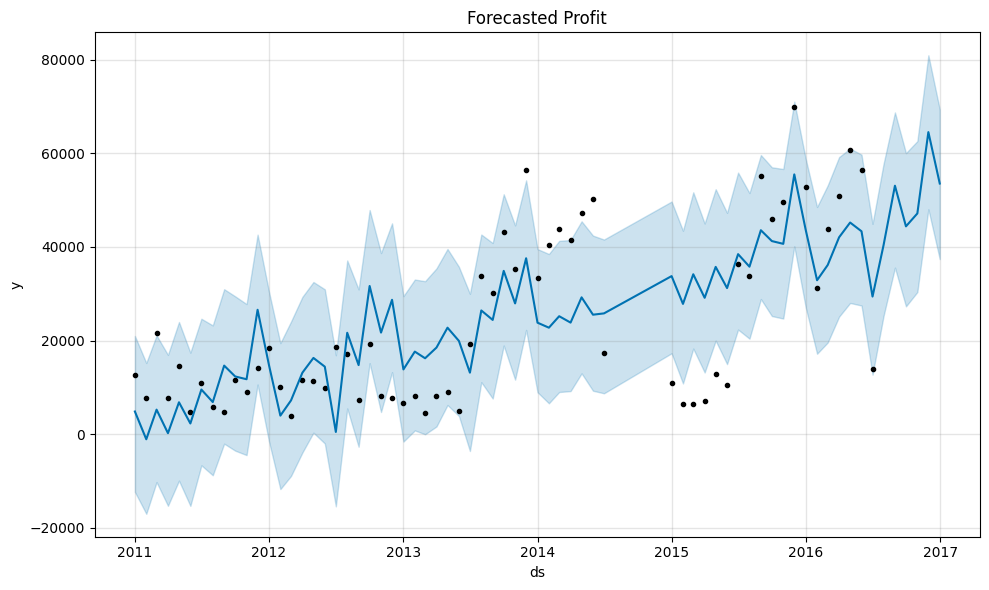

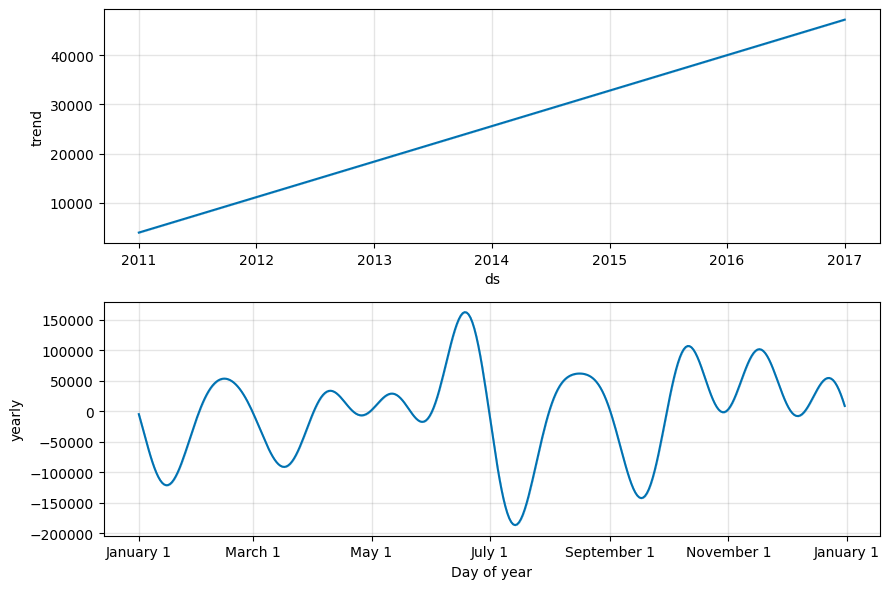

Forecast Evaluation for Profit: MAE=10775.61, RMSE=12740.75


In [123]:
# Forecast Revenue
forecast_revenue, df_merged_revenue = prophet_forecast(monthly_summary, 'Revenue')

# Forecast Orders
forecast_orders, df_merged_orders= prophet_forecast(monthly_summary, 'Orders')

# Forecast Profit
forecast_profit , df_merged_profit = prophet_forecast(monthly_summary, 'Profit')

In [129]:
# --- Random Forest Forecasting for Revenue, Profit, and Orders ---
# Prepare data for Random Forest

features = ['Month', 'Season_encoded']
targets = ['Revenue', 'Profit', 'Order_Quantity']

# Dictionary to store model results
rf_results = {}

# Loop through each target variable
for target in targets:
    X = sales[features]
    y = sales[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on test data
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results for later comparison
    rf_results[target] = {
        'model': rf_model,
        'y_test': y_test,
        'y_pred': y_pred,
        'MAE': mae,
        'RMSE': rmse
    }

    # Print evaluation metrics
    print(f"\nRandom Forest Forecast for {target}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")


Random Forest Forecast for Revenue:
MAE: 893.72
RMSE: 1484.76

Random Forest Forecast for Profit:
MAE: 313.68
RMSE: 516.68

Random Forest Forecast for Order_Quantity:
MAE: 8.40
RMSE: 9.51



📊 Model Comparison for Revenue:
Prophet       - MAE: 28472.35 | RMSE: 34007.43
Random Forest - MAE: 893.72 | RMSE: 1484.76


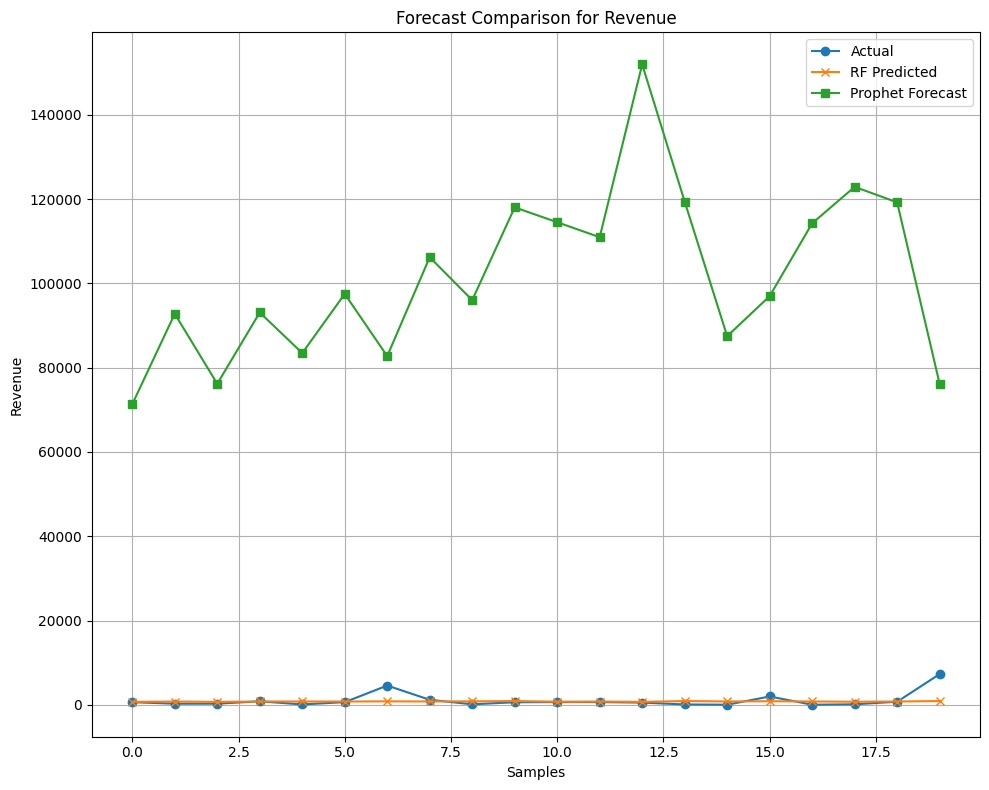


📊 Model Comparison for Profit:
Prophet       - MAE: 10775.61 | RMSE: 12740.75
Random Forest - MAE: 313.68 | RMSE: 516.68


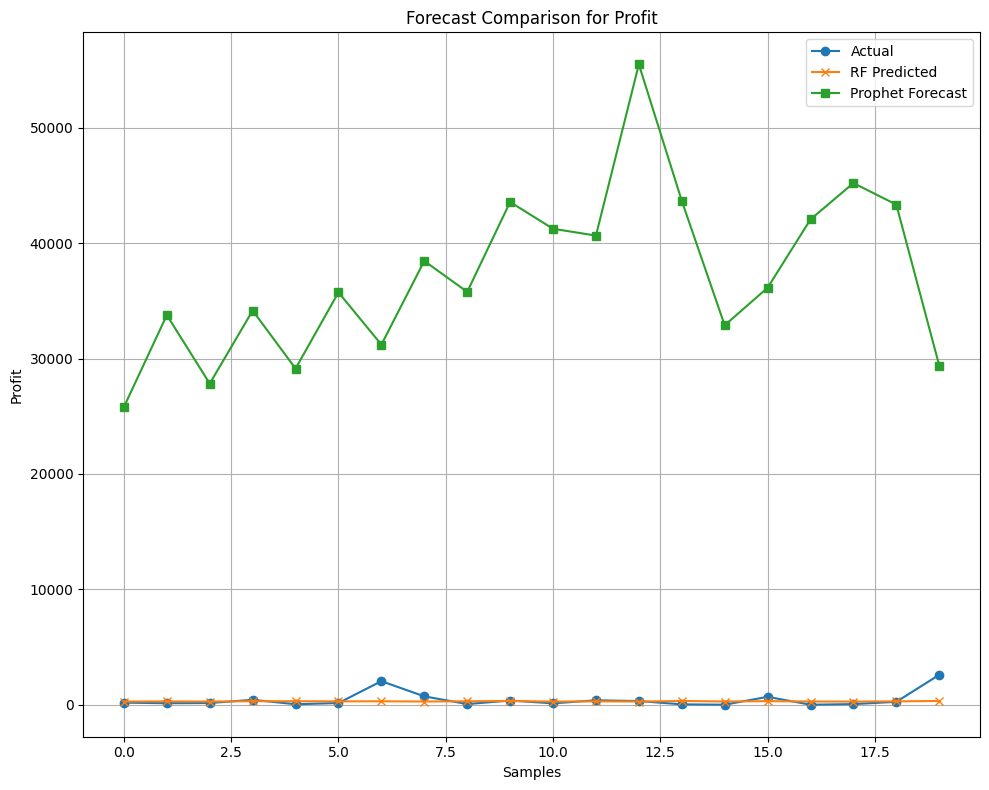


📊 Model Comparison for Order_Quantity:
Prophet       - MAE: 672.19 | RMSE: 831.87
Random Forest - MAE: 8.40 | RMSE: 9.51


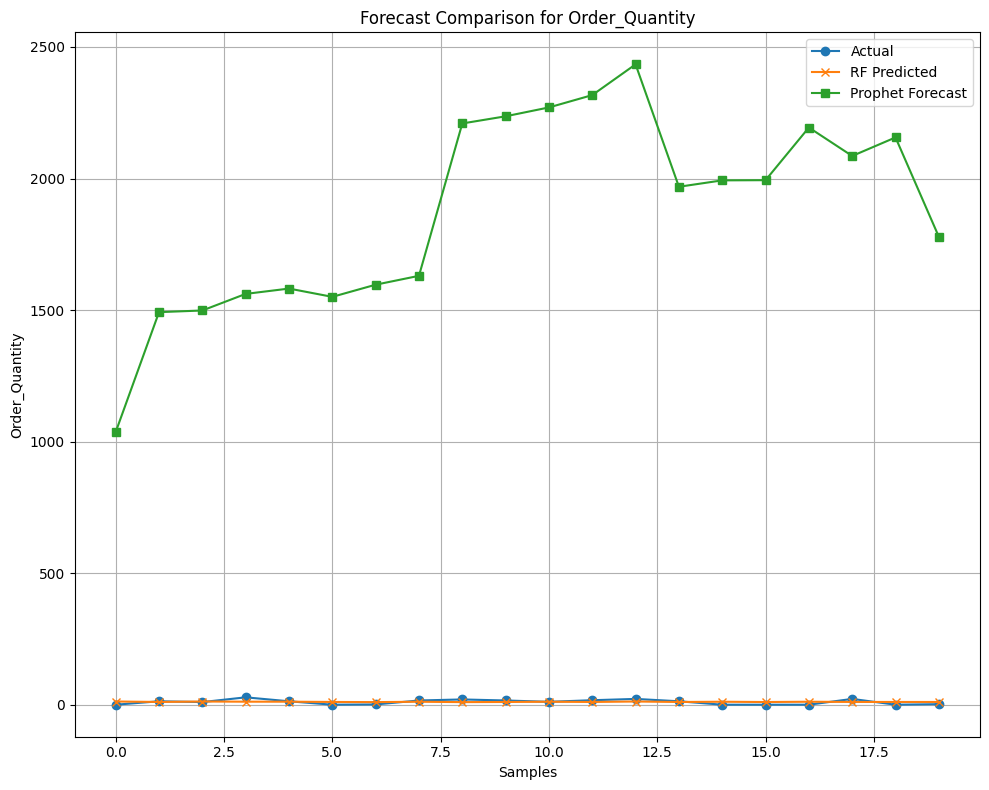

In [131]:
# --- Model Comparison for Prophet vs Random Forest for each target ---

# Prophet merged forecasts
prophet_results = {
    'Revenue': df_merged_revenue,
    'Profit': df_merged_profit,
    'Order_Quantity': df_merged_orders
}

# Loop through each target and compare performance
for target in ['Revenue', 'Profit', 'Order_Quantity']:
    # Prophet metrics
    df_merged = prophet_results[target]
    mae_prophet = mean_absolute_error(df_merged['y'], df_merged['yhat'])
    rmse_prophet = np.sqrt(mean_squared_error(df_merged['y'], df_merged['yhat']))

    # Random Forest metrics
    mae_rf = rf_results[target]['MAE']
    rmse_rf = rf_results[target]['RMSE']

    print(f"\n📊 Model Comparison for {target}:")
    print(f"Prophet       - MAE: {mae_prophet:.2f} | RMSE: {rmse_prophet:.2f}")
    print(f"Random Forest - MAE: {mae_rf:.2f} | RMSE: {rmse_rf:.2f}")

    # Plot forecast comparison
    plt.figure(figsize=(10, 8))
    plt.plot(rf_results[target]['y_test'].values[:20], label='Actual', marker='o')
    plt.plot(rf_results[target]['y_pred'][:20], label='RF Predicted', marker='x')
    plt.plot(df_merged['yhat'].tail(20).values, label='Prophet Forecast', marker='s')
    plt.title(f'Forecast Comparison for {target}')
    plt.xlabel('Samples')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

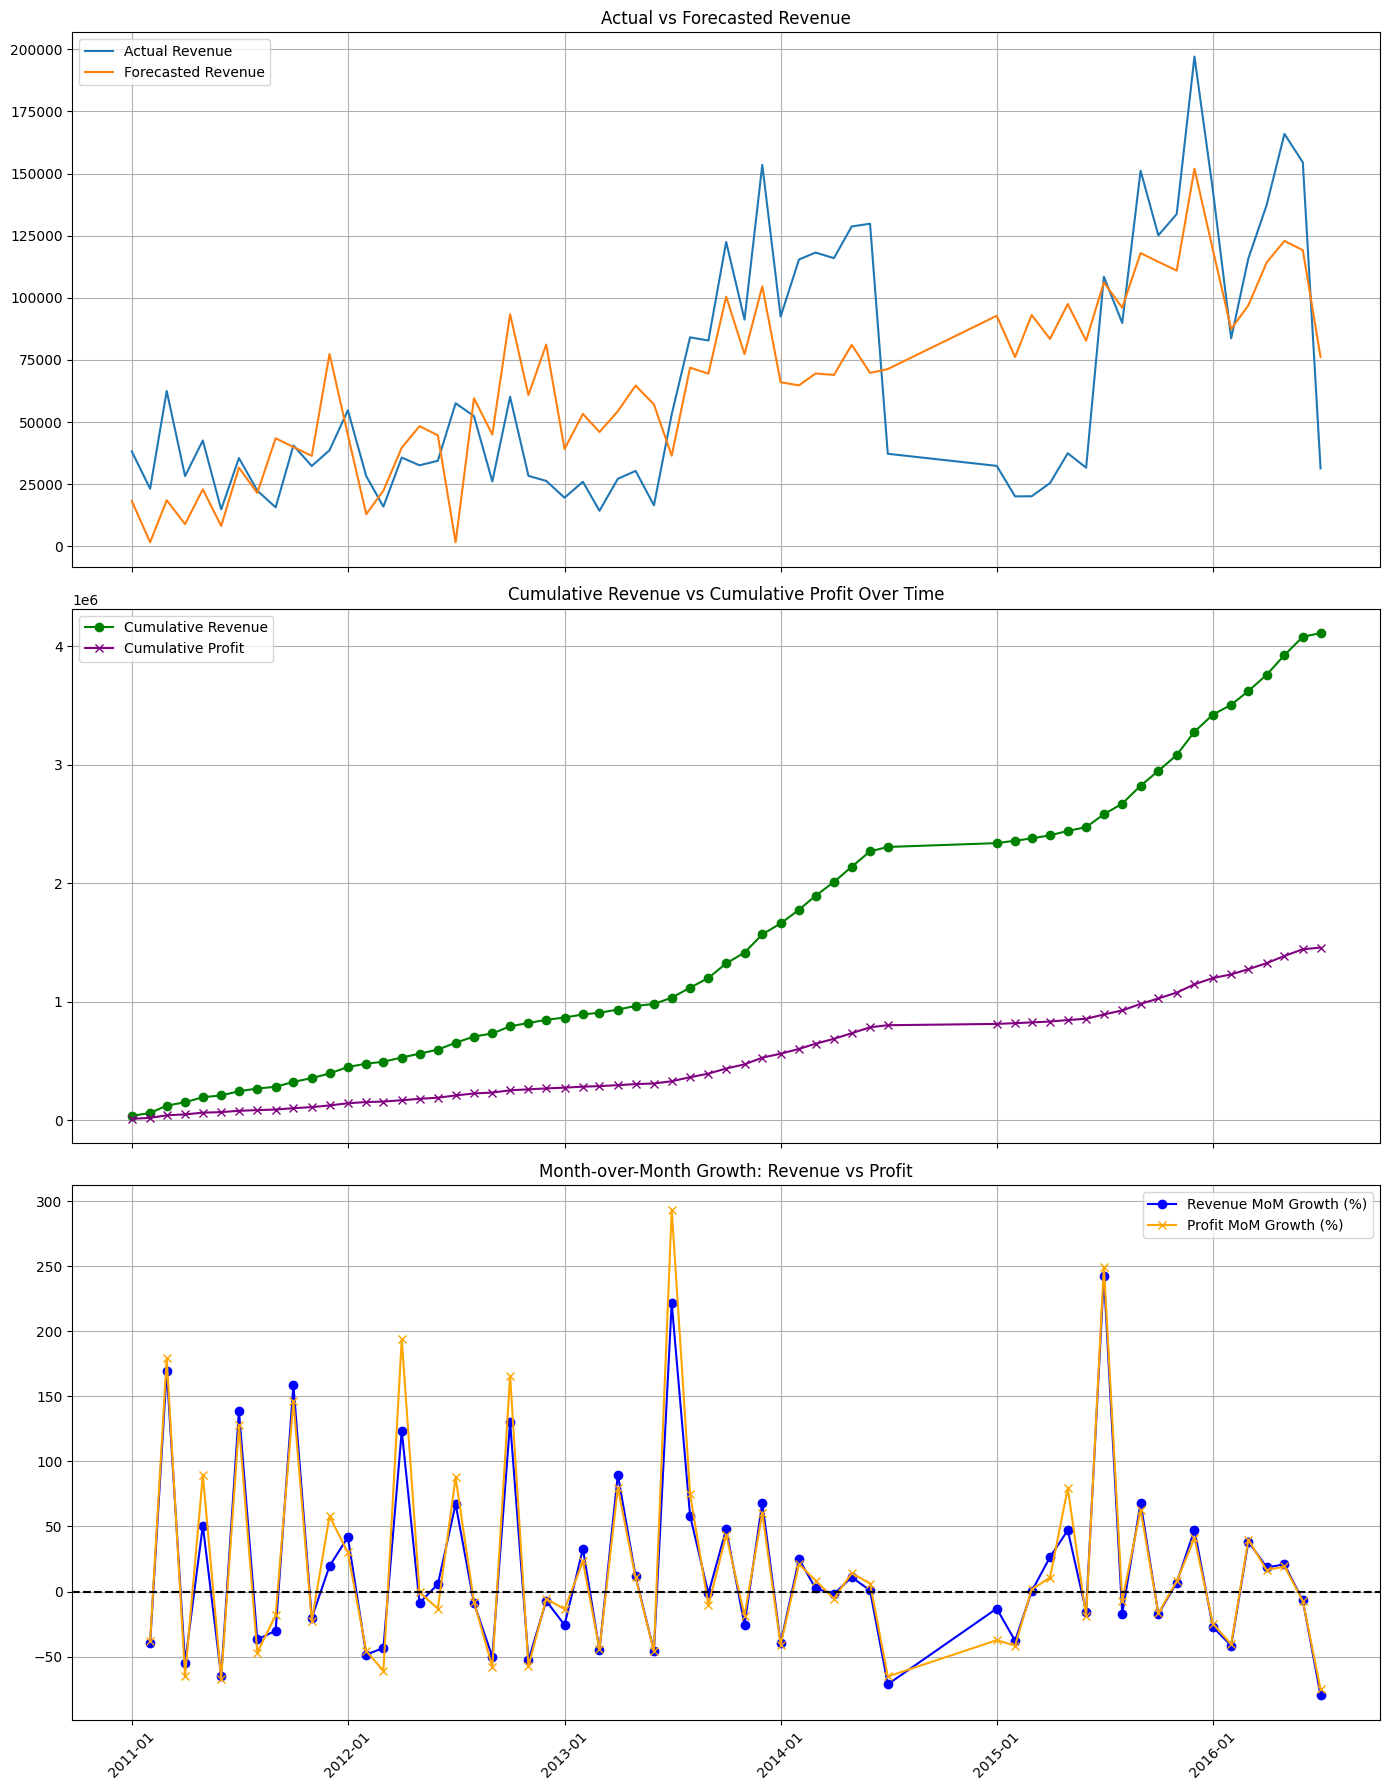

In [132]:
# Subplots: 3 in total now (after merging cumulative plot & MoM growth plot)
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plot 1: Actual vs Forecasted Revenue
axes[0].plot(df_merged_revenue['ds'], df_merged_revenue['y'], label='Actual Revenue')
axes[0].plot(df_merged_revenue['ds'], df_merged_revenue['yhat'], label='Forecasted Revenue')
axes[0].set_title('Actual vs Forecasted Revenue')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Combined Cumulative Revenue & Profit
axes[1].plot(monthly_summary.index, monthly_summary['Cumulative_Revenue'], label='Cumulative Revenue', color='green', marker='o')
axes[1].plot(monthly_summary.index, monthly_summary['Cumulative_Profit'], label='Cumulative Profit', color='purple', marker='x')
axes[1].set_title('Cumulative Revenue vs Cumulative Profit Over Time')
axes[1].legend()
axes[1].grid(True)

# Plot 3: Combined MoM Growth for Revenue & Profit
axes[2].plot(monthly_summary.index, monthly_summary['Revenue_MoM_Growth'], label='Revenue MoM Growth (%)', color='blue', marker='o')
axes[2].plot(monthly_summary.index, monthly_summary['Profit_MoM_Growth'], label='Profit MoM Growth (%)', color='orange', marker='x')
axes[2].axhline(0, color='black', linestyle='--')
axes[2].set_title('Month-over-Month Growth: Revenue vs Profit')
axes[2].legend()
axes[2].grid(True)

#  Format x-axis with date labels
for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [128]:
# Revenue trends across product categories over time
category_trend = sales.groupby(['YearMonth', 'Product_Category'])['Revenue'].sum().reset_index()
pivot = category_trend.pivot(index='YearMonth', columns='Product_Category', values='Revenue')

pivot.plot(figsize=(10, 8))
plt.title('Revenue Trend by Product Category')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-128-1543369289>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_trend = sales.groupby(['YearMonth', 'Product_Category'])['Revenue'].sum().reset_index()


## Conclusions & Recommendations

### 🔍 Conclusions

**Seasonality & Trends:**  
- Sales and revenue exhibit clear seasonality, with peaks in Spring and Summer, and declines in Fall and Winter.  
- Overall trends indicate steady growth in both revenue and profit over the analyzed period.

**Forecasting Results:**  
- The Prophet model provided interpretable forecasts with clear insights into trends and seasonal components.  
- The Random Forest model showed better accuracy (lower MAE and RMSE), especially when leveraging features like Month and Season.

**Product Category Performance:**  
- Categories such as Mountain Bikes and Touring Bikes contributed significantly to total revenue.  
- Other categories like Accessories generated lower revenue but may offer higher profit margins.

**Revenue Growth Analysis:**  
- Month-over-month (MoM) growth rates for revenue and profit showed irregular patterns, possibly driven by seasonal promotions or campaigns.

### 📈 Recommendations

**Seasonal Campaign Strategy:**  
- Focus marketing and promotional efforts during Spring and Summer to maximize peak season opportunities.  
- Utilize off-season periods (e.g., Winter) for clearance sales or customer acquisition initiatives.

**Product Strategy Optimization:**  
- Increase investment in top-performing product categories such as Mountain and Touring Bikes.  
- Reassess underperforming categories and consider bundling them with popular products to enhance value.

**Forecasting Model Usage:**  
- Use Prophet for simple, interpretable long-term trend analysis.  
- Deploy Random Forest for more precise short-term forecasts to support operational planning.

**Power BI Dashboard Development:**  
- Develop an interactive Power BI dashboard to monitor key performance indicators (KPIs) such as monthly revenue, profit, category performance, and MoM growth.  
- Include visualizations like cumulative trends and seasonal breakdowns for deeper insights.